# Primer parcial
Nombre: Vargas Lezano César Luis

Carrera: Ingenieria de sistemas

CU: 35-5303

Grupo: 1

## Acerca del dataset
Temática: Calcular la cantidad de coronas del ganador de Clash Royale (1,2,3) 

El dataset cuenta con 31.9 millores de datos

- url https://www.kaggle.com/datasets/tristanwassner/clash-royale-s18-ladder-datasets-for-prediction/data

de loc cuales por temas de rendimiento y limitante se seleccionara 80000 datos y 20 columnas, las cuales serian:

# Temática del Dataset: Calcular la cantidad de coronas de Clash Royale
# Variables de Entrada: winner.totalcard.level, 
* winner.troop.count, 
* winner.structure.count, 
* winner.spell.count, 
* winner.common.count, 
* winner.rare.count, 
* winner.epic.count, 
* winner.legendary.count 
* winner.elixir.average
* loser.crowns
* loser.totalcard.level, 
* loser.troop.count, 
* loser.structure.count, 
* loser.spell.count, 
* loser.common.count, 
* loser.rare.count, 
* loser.epic.count, 
* loser.legendary.count 
* loser.elixir.average
# Variables de Salida: 
* - winner.crowns

# 1.- Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.

Para poder realizar este paso se obta por insertar nuevas columnas con sus datos para cumplir de manera que pide el enunciado, de la siguiente manera:

# Atributos caracteres
Se usara 3 tipos de caracteres que son los "tipos de carta"los cuales tendran un significado o valor:
* A = tropp
* B = spell
* C = structure

# Atributo texto
Se usara 2 tipos para esto, que serian la estrategia que usa el jugador, como puede ser:
* Offensive
* Defensive

# Atributos booleanos
Se usara true o false para poder determinar si el jugador uso cartas legendarias, y otro para determinar si el usuario obtuvo las 3 coronoas

* Cartas legendarias
* Obtuvo 3 coronas

In [63]:
import pandas as pd
import numpy as np

# Cargar el dataset original
data = pd.read_csv('./BattlesStaging_01012021_WL_tagged.csv', usecols=[39,40,41,42,43,44,45,46,47,65,66,67,68,69,70,71,72,73,16,8], nrows=80000)

# Definir las posibles categorías y valores
strategy_types = ['Offensive', 'Defensive']
card_types = ['A', 'B', 'C']
booleans = [True, False]

# Generar valores aleatorios para las nuevas columnas
data['winner.strategy_type'] = np.random.choice(strategy_types, len(data))
data['loser.strategy_type'] = np.random.choice(strategy_types, len(data))
data['winner.fav_card_type'] = np.random.choice(card_types, len(data))
data['loser.fav_card_type'] = np.random.choice(card_types, len(data))
data['winner.used_legendary'] = np.random.choice(booleans, len(data))
data['loser.used_legendary'] = np.random.choice(booleans, len(data))
data['winner.triple_crown_win'] = np.random.choice(booleans, len(data))

# Guardar el nuevo dataset sintético en un archivo CSV
data.to_csv('synthetic_dataset.csv', index=False)

# 2.- Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.

verificando los valores actuales del dataset sintetico

In [64]:
data = pd.read_csv('synthetic_dataset.csv')
print(data.head())

   winner.crowns  loser.crowns  winner.totalcard.level  winner.troop.count  \
0            2.0           1.0                     104                   5   
1            1.0           0.0                      99                   5   
2            2.0           0.0                     104                   6   
3            2.0           1.0                      80                   4   
4            3.0           0.0                     104                   5   

   winner.structure.count  winner.spell.count  winner.common.count  \
0                       1                   2                    3   
1                       1                   2                    2   
2                       0                   2                    2   
3                       0                   4                    1   
4                       1                   2                    3   

   winner.rare.count  winner.epic.count  winner.legendary.count  ...  \
0                  2                  

In [65]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   winner.crowns            80000 non-null  float64
 1   loser.crowns             80000 non-null  float64
 2   winner.totalcard.level   80000 non-null  int64  
 3   winner.troop.count       80000 non-null  int64  
 4   winner.structure.count   80000 non-null  int64  
 5   winner.spell.count       80000 non-null  int64  
 6   winner.common.count      80000 non-null  int64  
 7   winner.rare.count        80000 non-null  int64  
 8   winner.epic.count        80000 non-null  int64  
 9   winner.legendary.count   80000 non-null  int64  
 10  winner.elixir.average    80000 non-null  float64
 11  loser.totalcard.level    80000 non-null  int64  
 12  loser.troop.count        80000 non-null  int64  
 13  loser.structure.count    80000 non-null  int64  
 14  loser.spell.count     

 Como se puede observar se cuenta con 80000 datos y las 26 columnas (contando desde 0)

 Ahora duplicando 80000 nuevos valores, sin que se repitan con los primeros 80000

In [66]:
# Definir las posibles categorías y valores
strategy_types = ['Offensive', 'Defensive']
card_types = ['A', 'B', 'C']
booleans = [True, False]

# Número de filas que queremos generar
num_new_rows = len(data)

# Generar valores aleatorios para las nuevas columnas
new_data = pd.DataFrame({
    'winner.crowns': np.random.choice(data['winner.crowns'].unique(), num_new_rows),
    'loser.crowns': np.random.choice(data['loser.crowns'].unique(), num_new_rows),
    'winner.totalcard.level': np.random.choice(data['winner.totalcard.level'].unique(), num_new_rows),
    'winner.troop.count': np.random.choice(data['winner.troop.count'].unique(), num_new_rows),
    'winner.structure.count': np.random.choice(data['winner.structure.count'].unique(), num_new_rows),
    'winner.spell.count': np.random.choice(data['winner.spell.count'].unique(), num_new_rows),
    'winner.common.count': np.random.choice(data['winner.common.count'].unique(), num_new_rows),
    'winner.rare.count': np.random.choice(data['winner.rare.count'].unique(), num_new_rows),
    'winner.epic.count': np.random.choice(data['winner.epic.count'].unique(), num_new_rows),
    'winner.legendary.count': np.random.choice(data['winner.legendary.count'].unique(), num_new_rows),
    'winner.elixir.average': np.random.choice(data['winner.elixir.average'].unique(), num_new_rows),
    'loser.totalcard.level': np.random.choice(data['loser.totalcard.level'].unique(), num_new_rows),
    'loser.troop.count': np.random.choice(data['loser.troop.count'].unique(), num_new_rows),
    'loser.structure.count': np.random.choice(data['loser.structure.count'].unique(), num_new_rows),
    'loser.spell.count': np.random.choice(data['loser.spell.count'].unique(), num_new_rows),
    'loser.common.count': np.random.choice(data['loser.common.count'].unique(), num_new_rows),
    'loser.rare.count': np.random.choice(data['loser.rare.count'].unique(), num_new_rows),
    'loser.epic.count': np.random.choice(data['loser.epic.count'].unique(), num_new_rows),
    'loser.legendary.count': np.random.choice(data['loser.legendary.count'].unique(), num_new_rows),
    'loser.elixir.average': np.random.choice(data['loser.elixir.average'].unique(), num_new_rows),
    'winner.strategy_type': np.random.choice(strategy_types, num_new_rows),
    'loser.strategy_type': np.random.choice(strategy_types, num_new_rows),
    'winner.fav_card_type': np.random.choice(card_types, num_new_rows),
    'loser.fav_card_type': np.random.choice(card_types, num_new_rows),
    'winner.used_legendary': np.random.choice(booleans, num_new_rows),
    'loser.used_legendary': np.random.choice(booleans, num_new_rows),
    'winner.triple_crown_win': np.random.choice(booleans, num_new_rows)
})

# Concatenar los nuevos datos con los existentes
data = pd.concat([data, new_data], ignore_index=True)

# Guardar el dataset actualizado en el mismo archivo CSV
data.to_csv('synthetic_dataset.csv', index=False)

Verfificando que se hayan generado los nuevos valores correctamente

In [67]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   winner.crowns            160000 non-null  float64
 1   loser.crowns             160000 non-null  float64
 2   winner.totalcard.level   160000 non-null  int64  
 3   winner.troop.count       160000 non-null  int64  
 4   winner.structure.count   160000 non-null  int64  
 5   winner.spell.count       160000 non-null  int64  
 6   winner.common.count      160000 non-null  int64  
 7   winner.rare.count        160000 non-null  int64  
 8   winner.epic.count        160000 non-null  int64  
 9   winner.legendary.count   160000 non-null  int64  
 10  winner.elixir.average    160000 non-null  float64
 11  loser.totalcard.level    160000 non-null  int64  
 12  loser.troop.count        160000 non-null  int64  
 13  loser.structure.count    160000 non-null  int64  
 14  lose

como se puede evidenciar pasamos de tener 80000 datoa a 160000 en sus 27 columnas y haciendo que no se repitan los nuevos datos generados

# 3.- Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado.

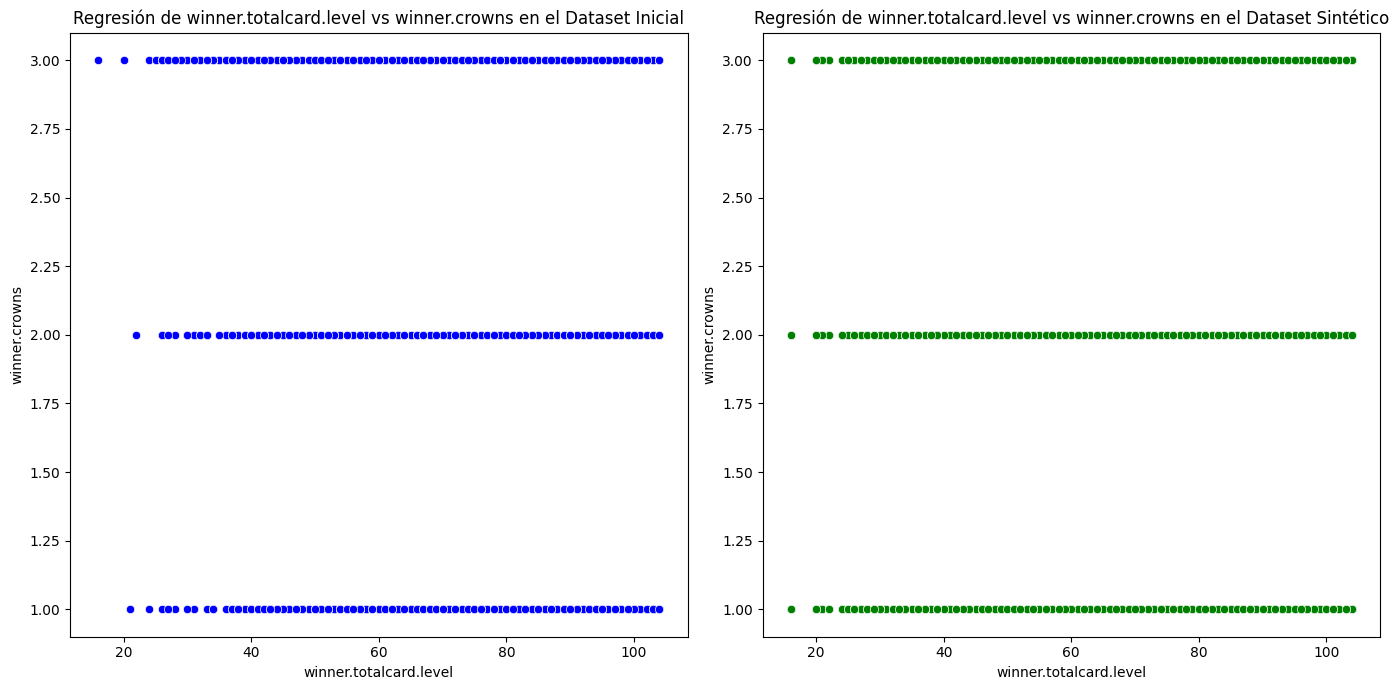

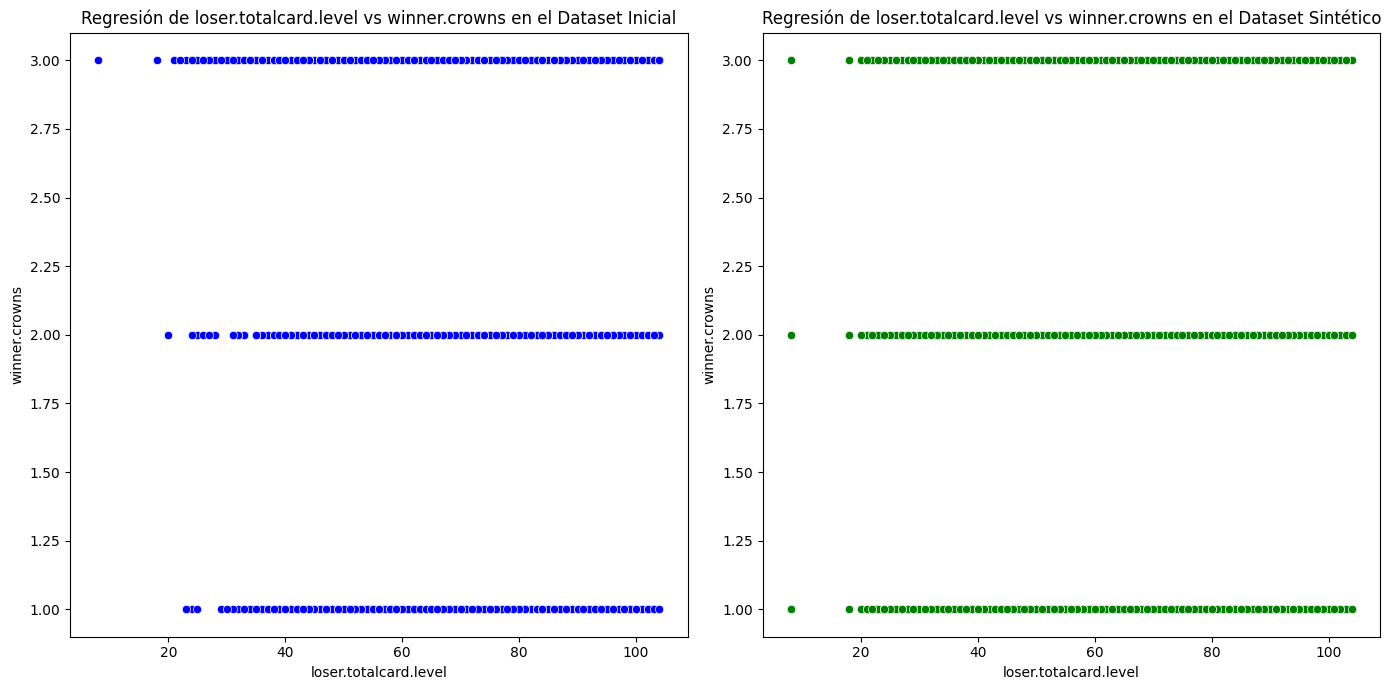

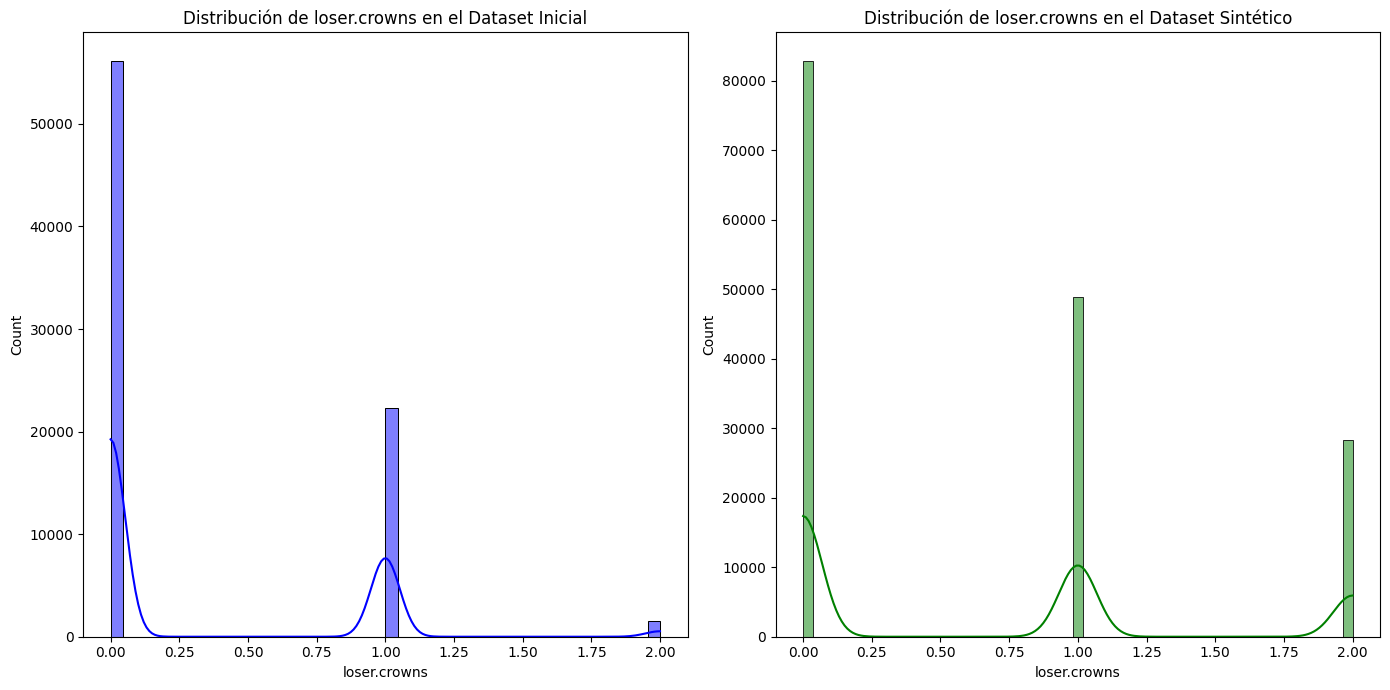

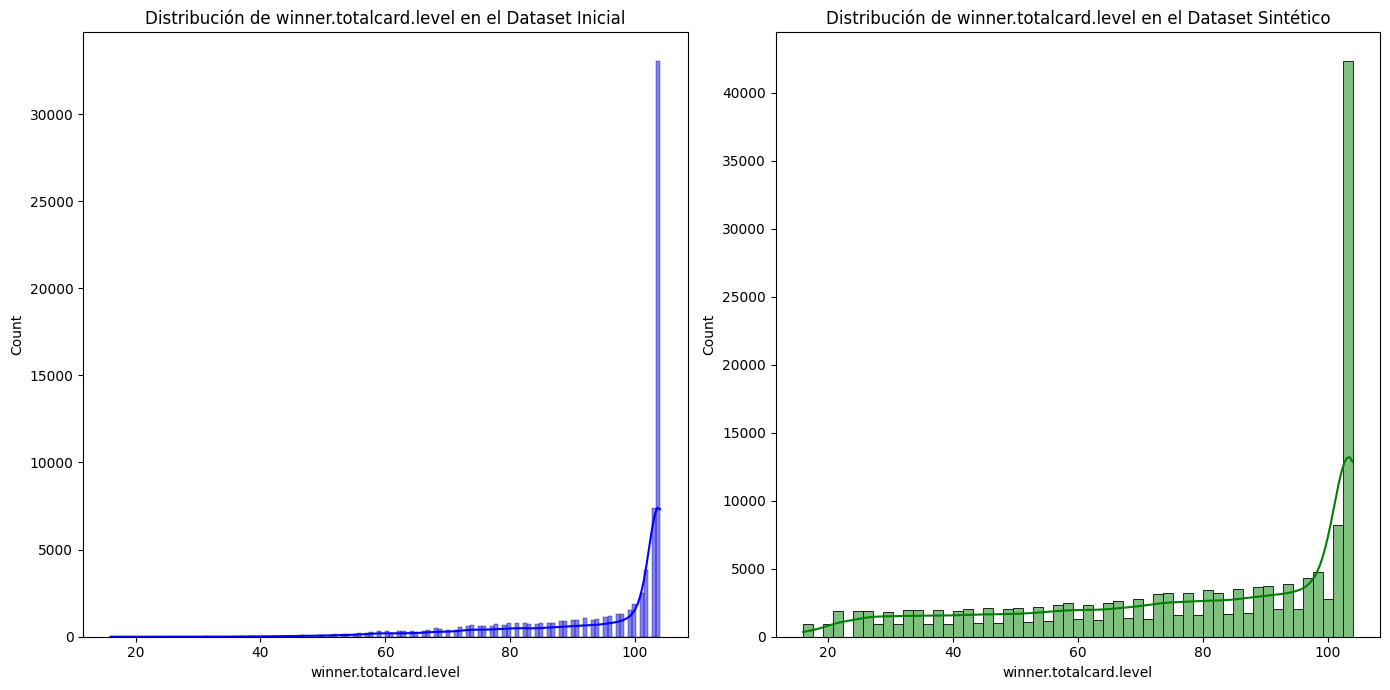

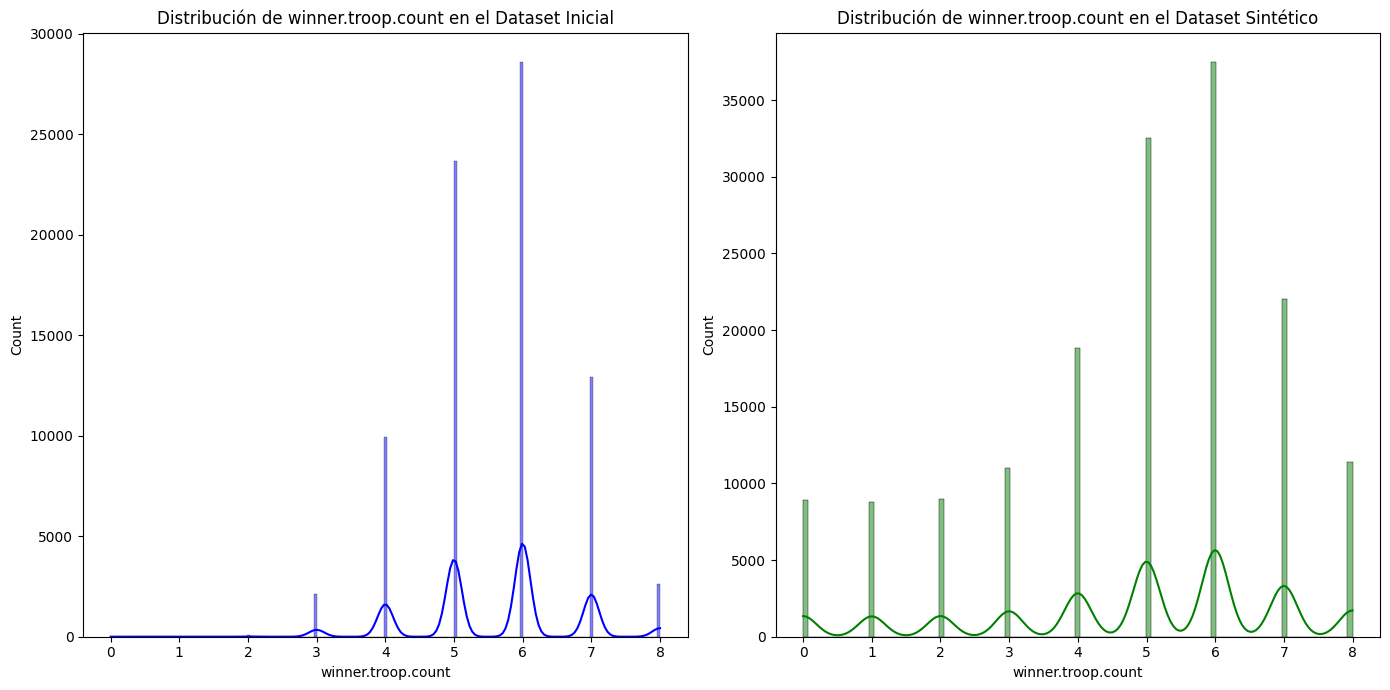

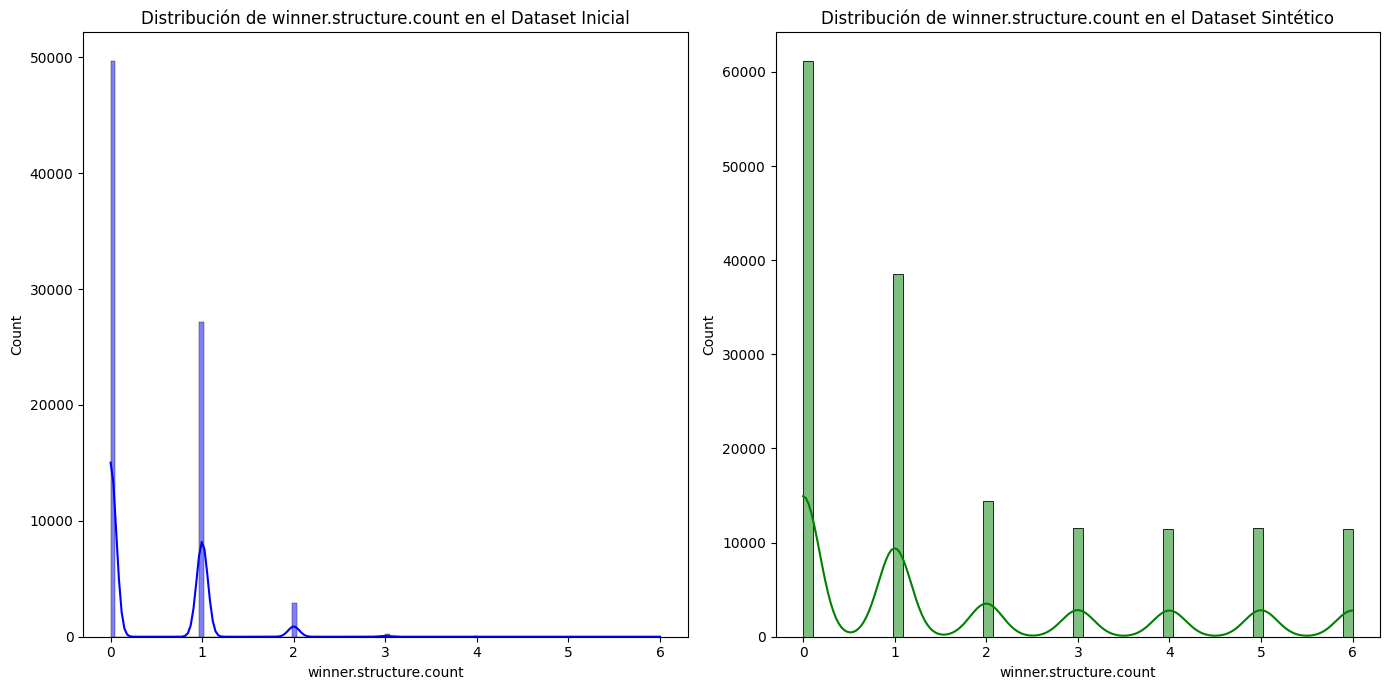

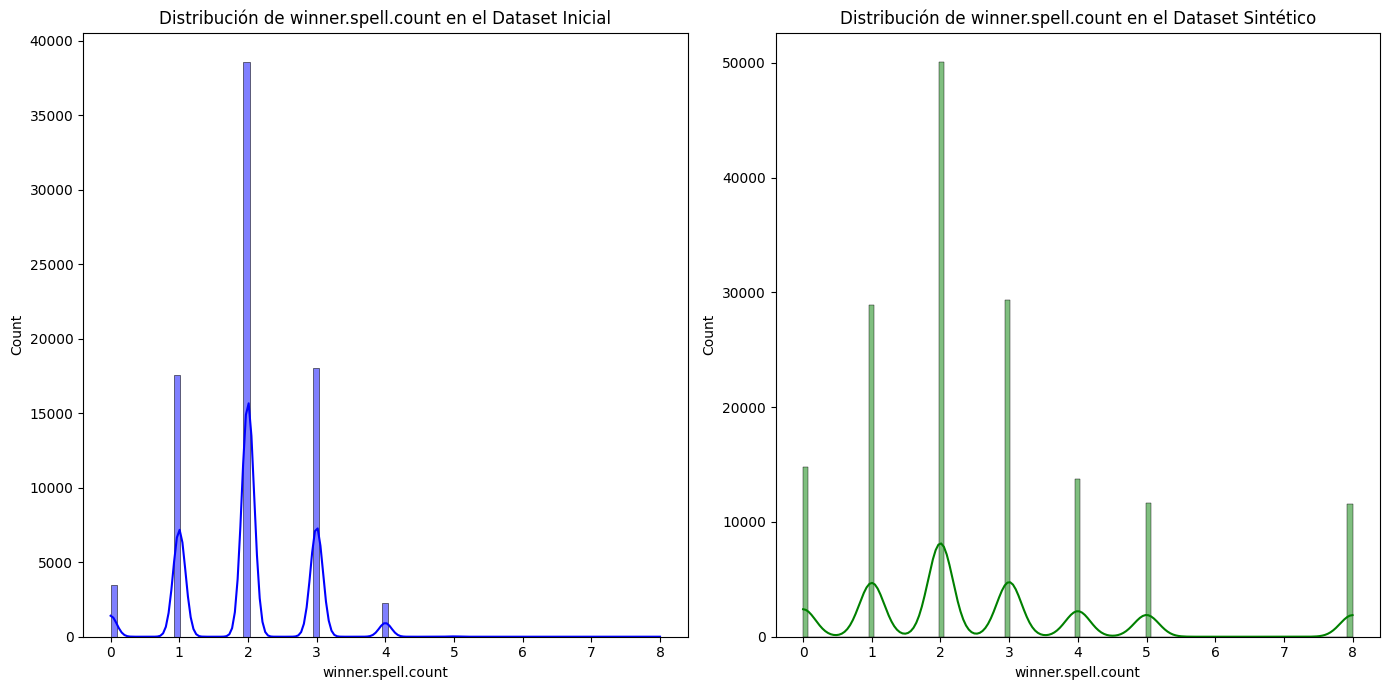

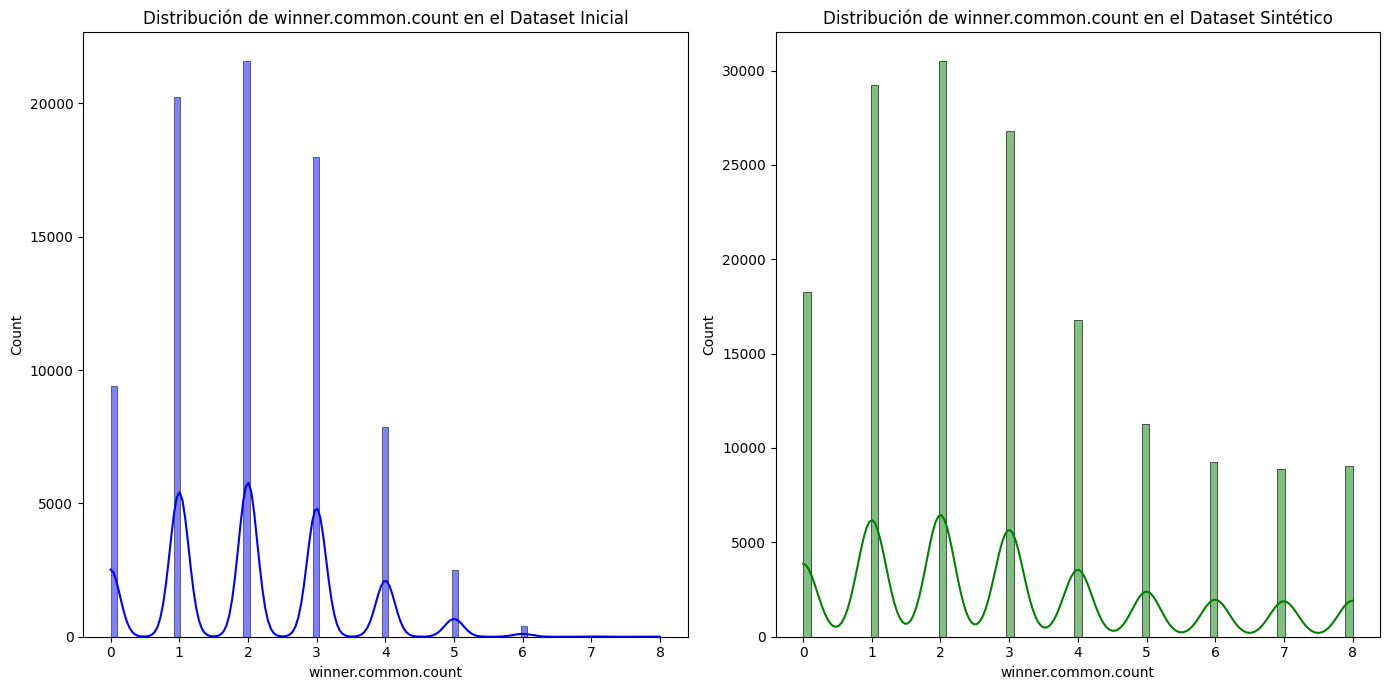

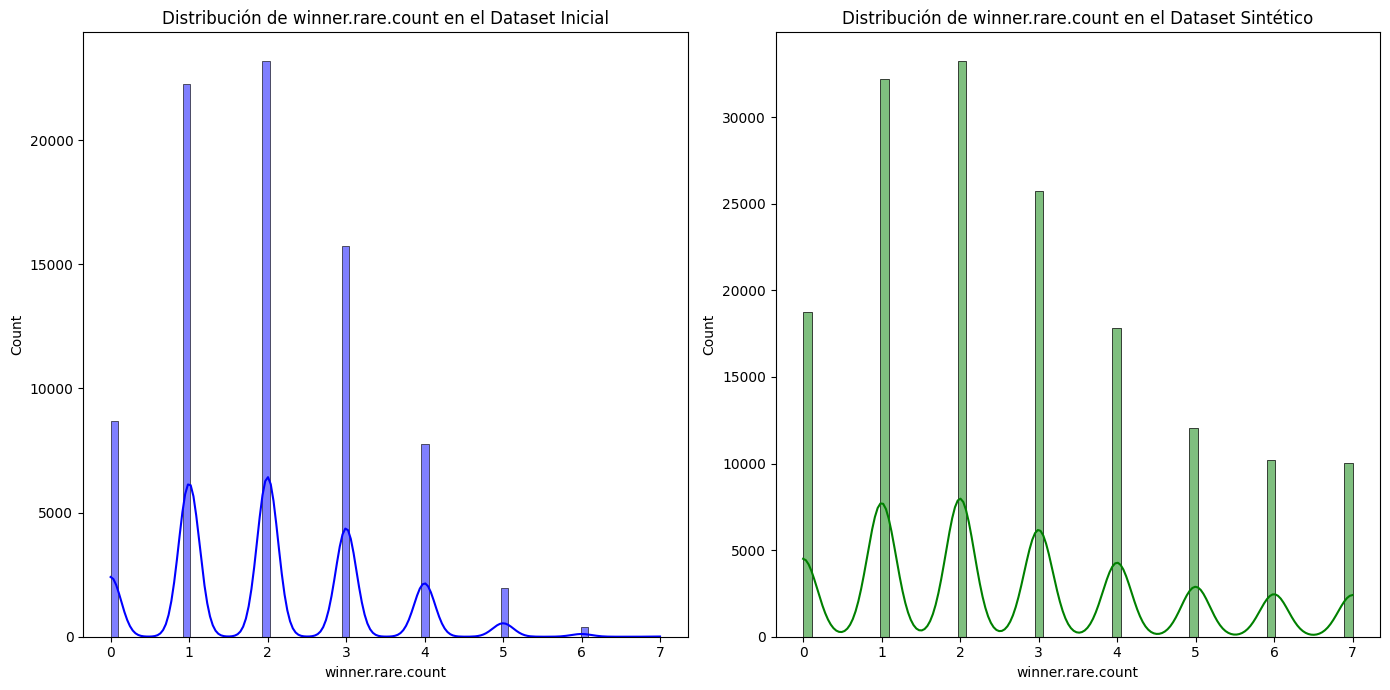

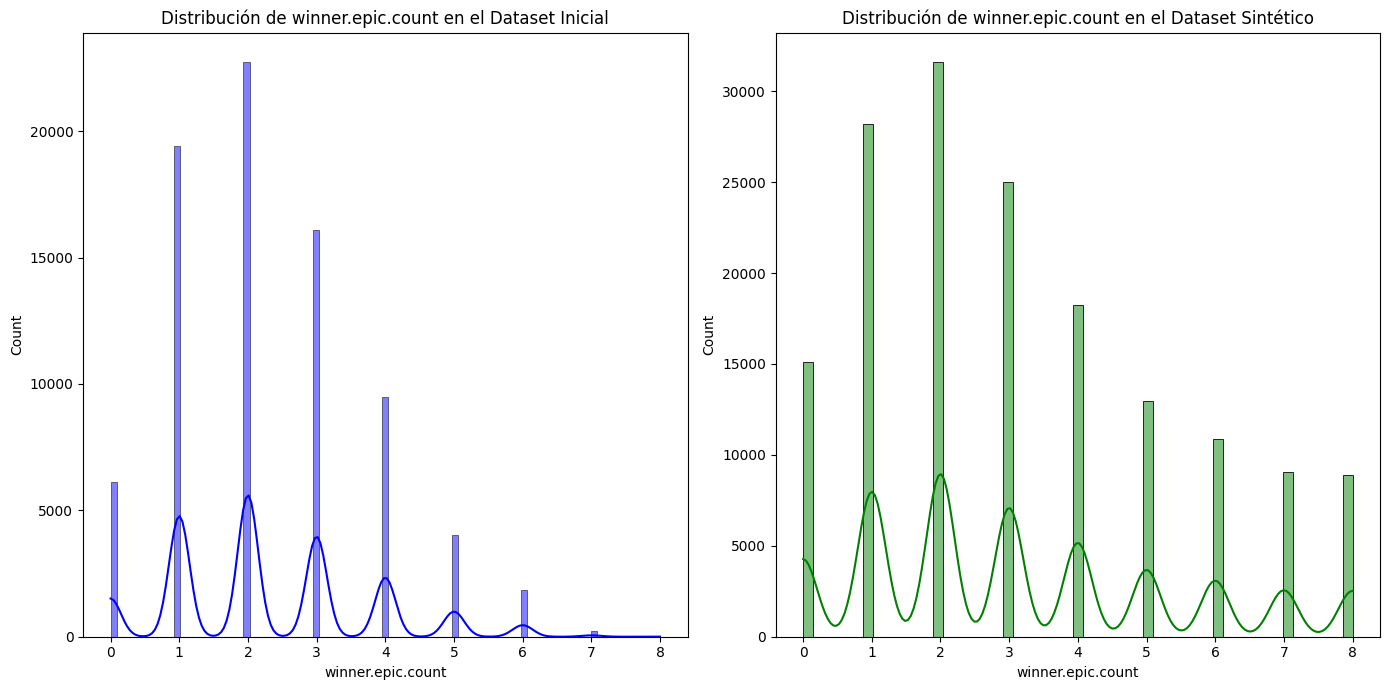

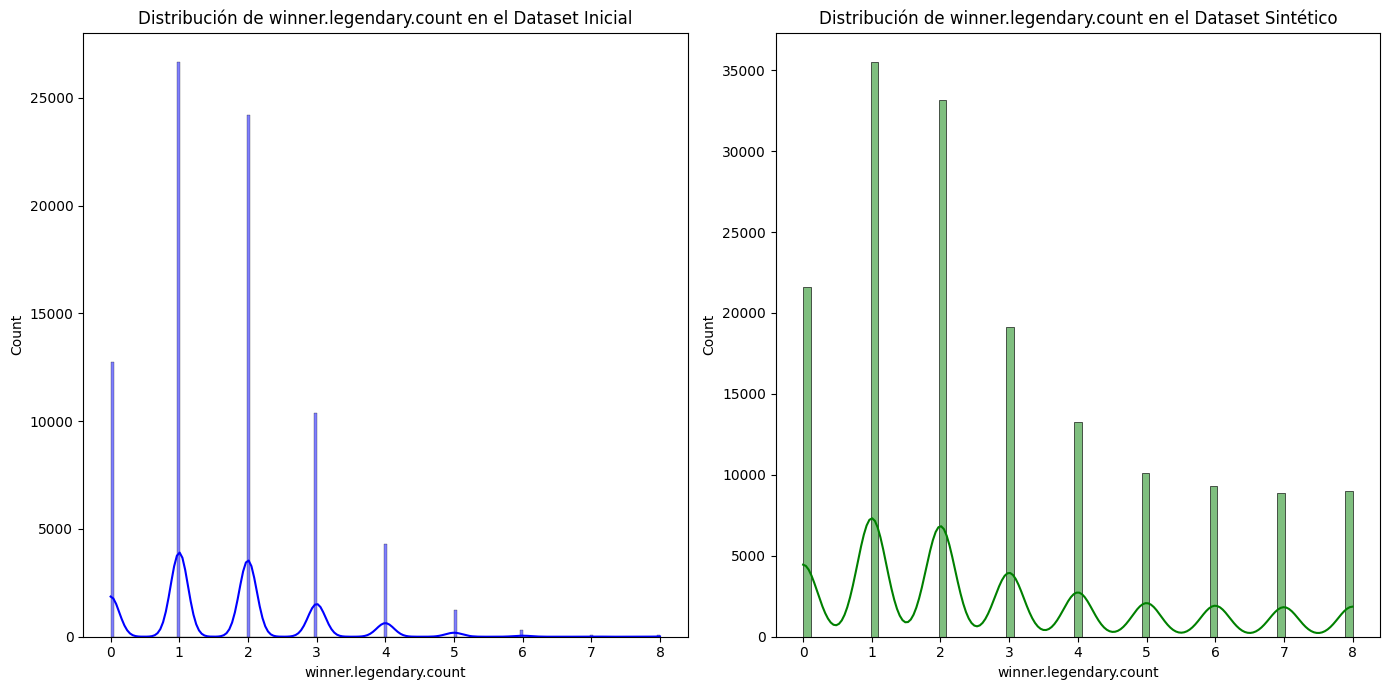

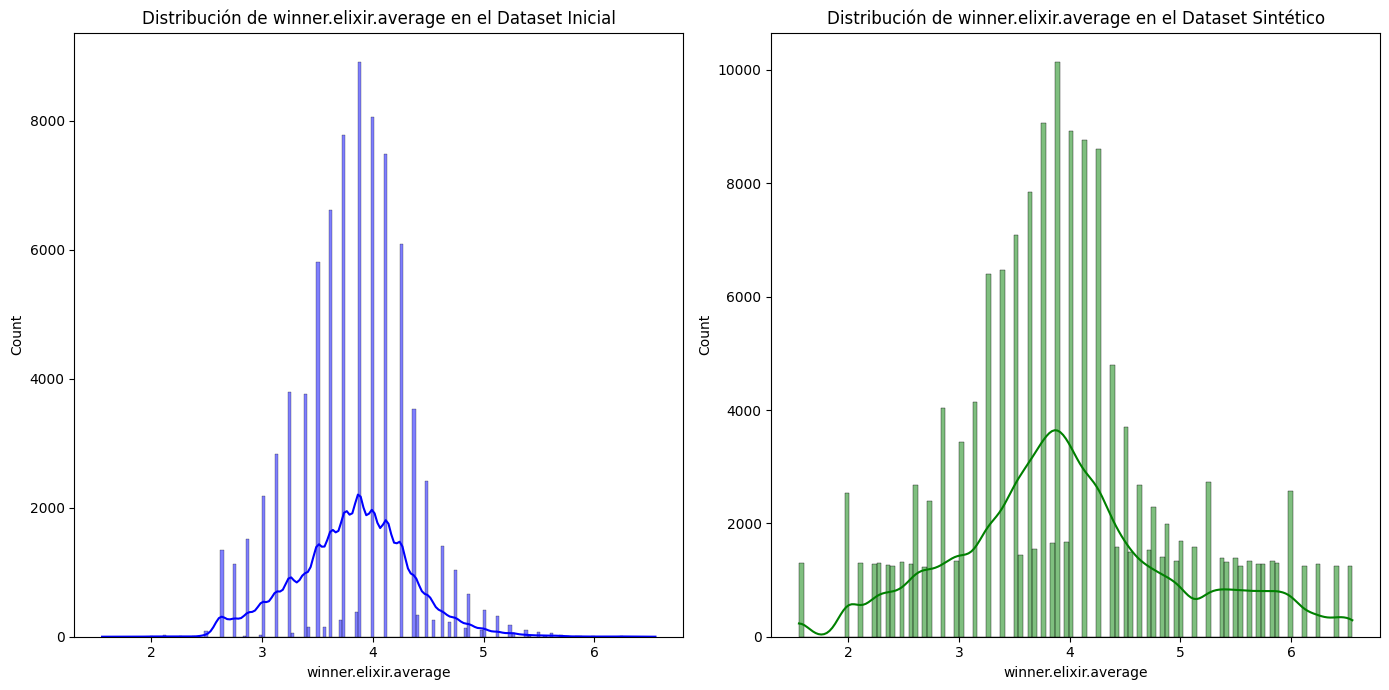

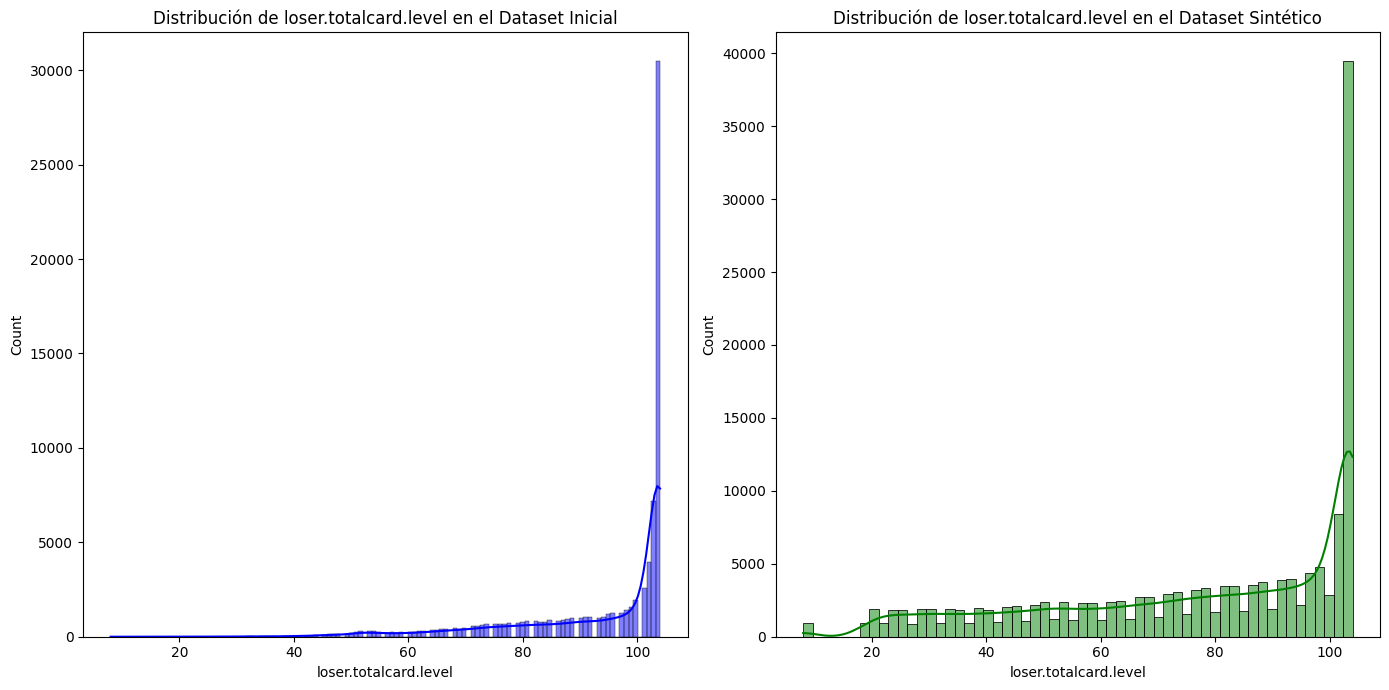

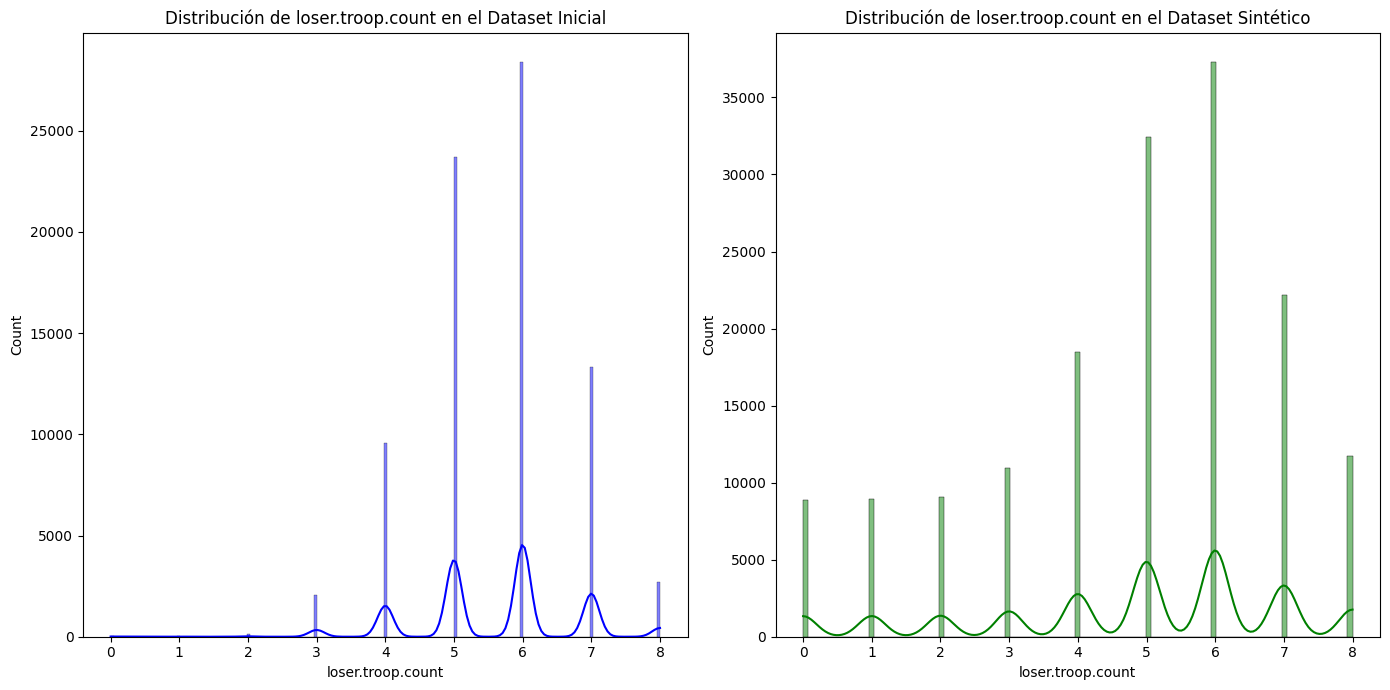

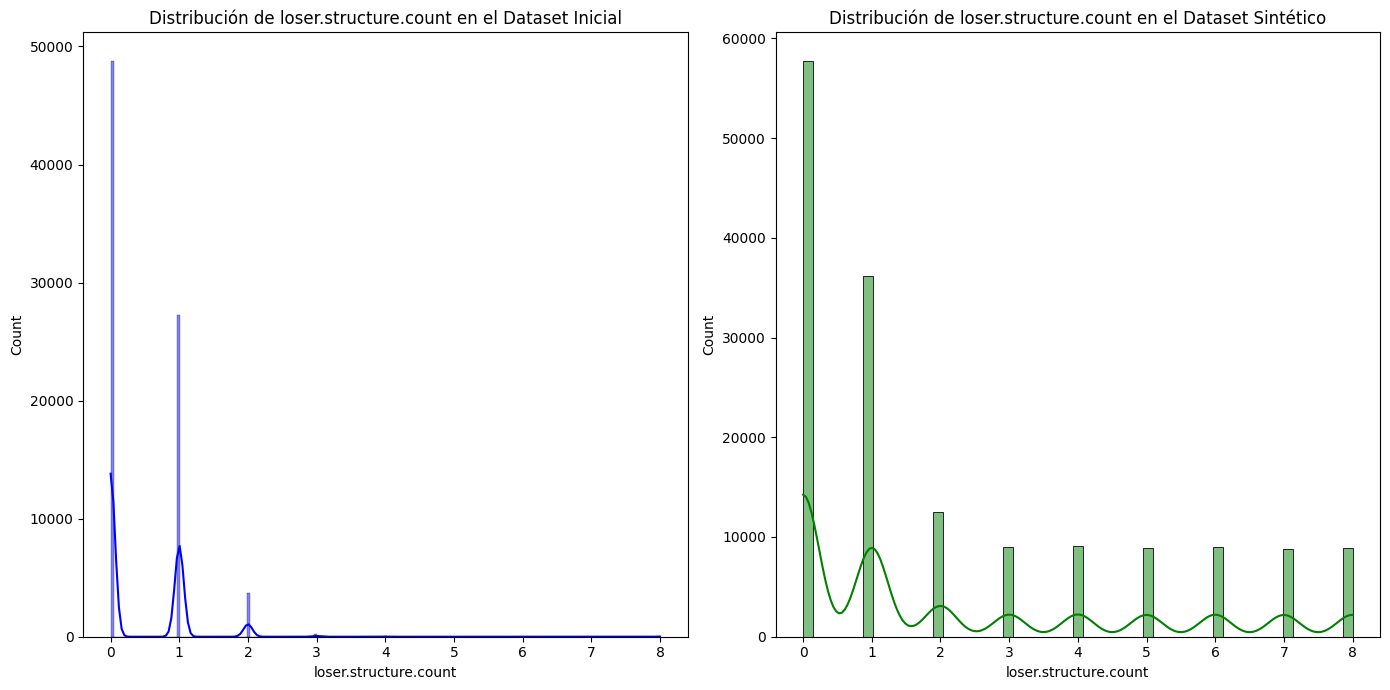

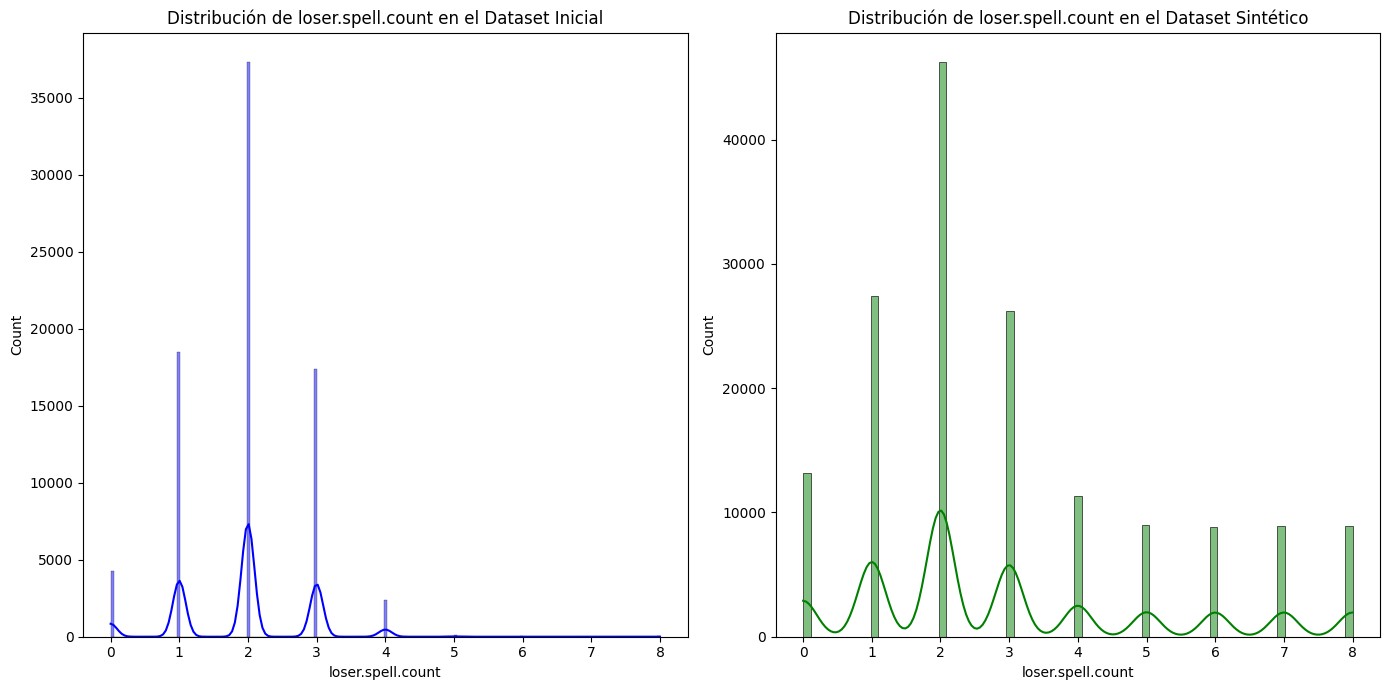

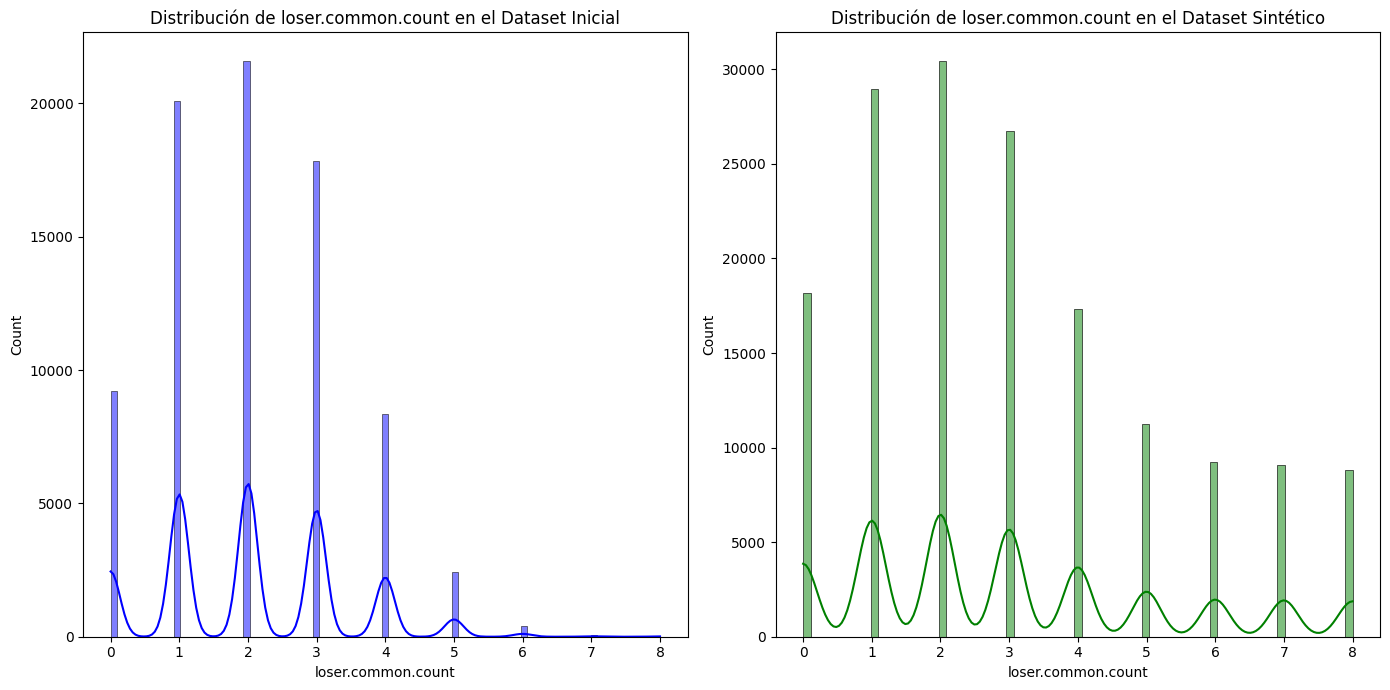

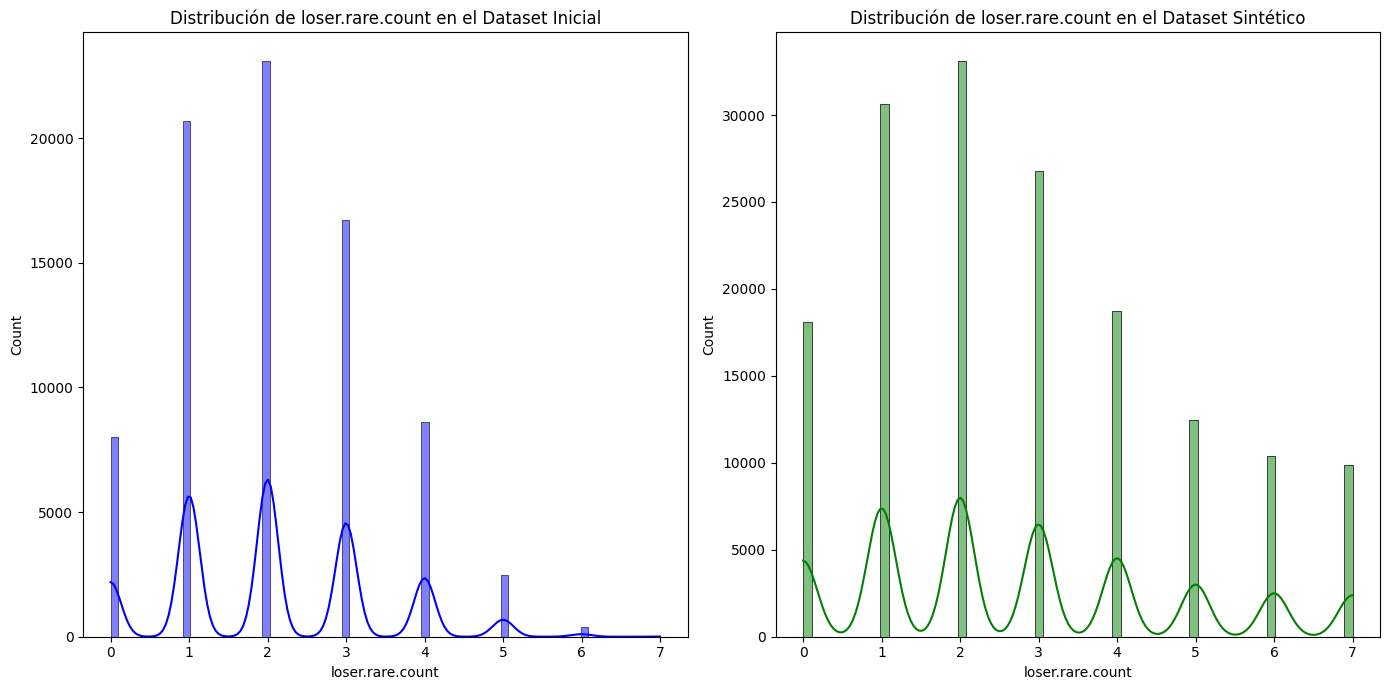

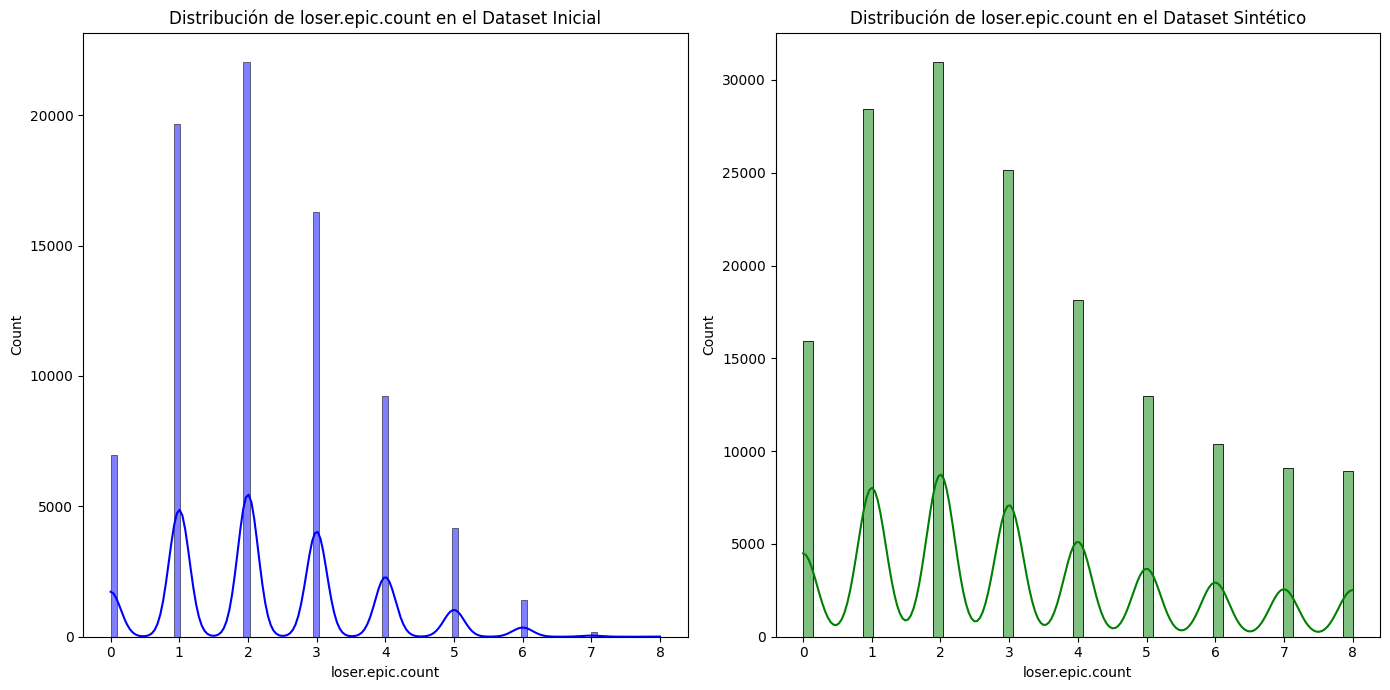

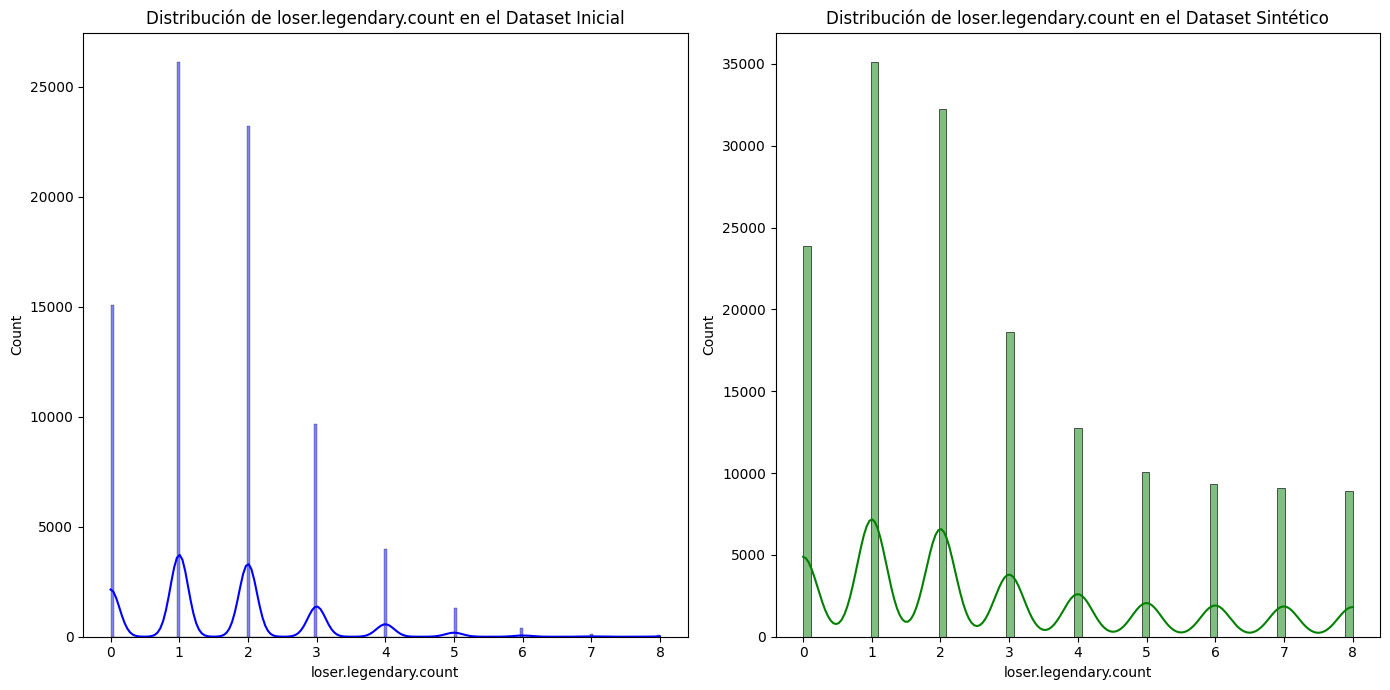

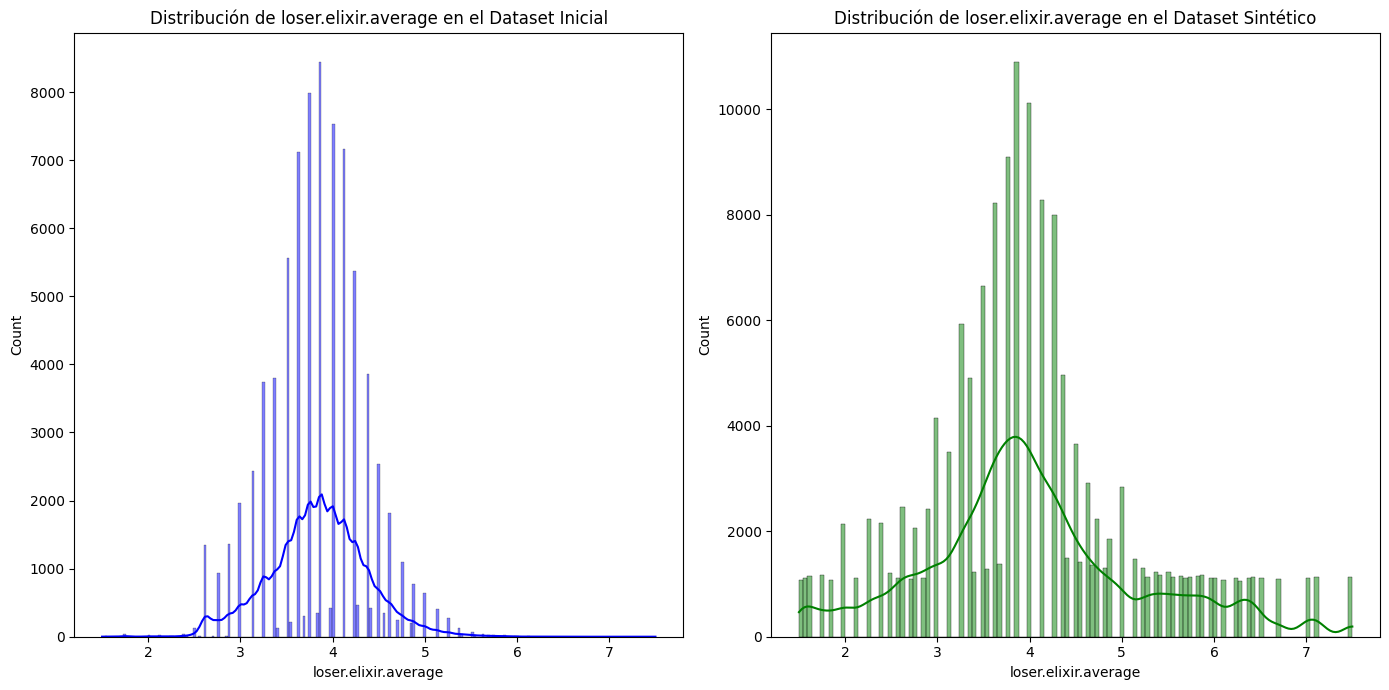

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset inicial
initial_data = pd.read_csv('./BattlesStaging_01012021_WL_tagged.csv', usecols=[39,40,41,42,43,44,45,46,47,65,66,67,68,69,70,71,72,73,16,8], nrows=80000)

# Cargar el dataset sintético
synthetic_data = pd.read_csv('synthetic_dataset.csv')

# Seleccionar una característica para graficar
x_feature = 'winner.totalcard.level'
y_feature = 'winner.crowns'

# Crear una gráfica de regresión para la característica seleccionada
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x=initial_data[x_feature], y=initial_data[y_feature], color='blue')
plt.title('Regresión de {} vs {} en el Dataset Inicial'.format(x_feature, y_feature))

plt.subplot(1, 2, 2)
sns.scatterplot(x=synthetic_data[x_feature], y=synthetic_data[y_feature], color='green')
plt.title('Regresión de {} vs {} en el Dataset Sintético'.format(x_feature, y_feature))

plt.tight_layout()
plt.show()

# Crear una gráfica de regresión para otra característica
x_feature = 'loser.totalcard.level'

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x=initial_data[x_feature], y=initial_data[y_feature], color='blue')
plt.title('Regresión de {} vs {} en el Dataset Inicial'.format(x_feature, y_feature))

plt.subplot(1, 2, 2)
sns.scatterplot(x=synthetic_data[x_feature], y=synthetic_data[y_feature], color='green')
plt.title('Regresión de {} vs {} en el Dataset Sintético'.format(x_feature, y_feature))

plt.tight_layout()
plt.show()

# Crear gráficas de distribución para todas las características
features = initial_data.columns

for feature in features:
    if feature != y_feature:  # Evitar graficar y_feature contra sí misma
        plt.figure(figsize=(14, 7))

        plt.subplot(1, 2, 1)
        sns.histplot(initial_data[feature], kde=True, color='blue')
        plt.title('Distribución de {} en el Dataset Inicial'.format(feature))

        plt.subplot(1, 2, 2)
        sns.histplot(synthetic_data[feature], kde=True, color='green')
        plt.title('Distribución de {} en el Dataset Sintético'.format(feature))

        plt.tight_layout()
        plt.show()


# 4.- Dividir los datos del dataset sintético en datos de entrenamiento y prueba

Ahora se debe de dividir los datos del dataset sintetico con 160000 datos, en un 80% entrenamiento y 20% prueba

In [69]:
import pandas as pd

# Cargar el dataset sintético
synthetic_data = pd.read_csv('synthetic_dataset.csv')

# Mezclar los datos aleatoriamente
synthetic_data = synthetic_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Calcular el índice de división
split_index = int(0.8 * len(synthetic_data))

# Dividir los datos en entrenamiento (80%) y prueba (20%)
train_data = synthetic_data[:split_index]
test_data = synthetic_data[split_index:]

# Guardar los datasets de entrenamiento y prueba en archivos CSV
train_data.to_csv('synthetic_train_data.csv', index=False)
test_data.to_csv('synthetic_test_data.csv', index=False)

print(f"Tamaño del dataset de entrenamiento: {len(train_data)}")
print(f"Tamaño del dataset de prueba: {len(test_data)}")

Tamaño del dataset de entrenamiento: 128000
Tamaño del dataset de prueba: 32000


Ahora verificando los datos de entrenamiento, para ver que no haya nulos

In [70]:
train_data = pd.read_csv('synthetic_train_data.csv')
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128000 entries, 0 to 127999
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   winner.crowns            128000 non-null  float64
 1   loser.crowns             128000 non-null  float64
 2   winner.totalcard.level   128000 non-null  int64  
 3   winner.troop.count       128000 non-null  int64  
 4   winner.structure.count   128000 non-null  int64  
 5   winner.spell.count       128000 non-null  int64  
 6   winner.common.count      128000 non-null  int64  
 7   winner.rare.count        128000 non-null  int64  
 8   winner.epic.count        128000 non-null  int64  
 9   winner.legendary.count   128000 non-null  int64  
 10  winner.elixir.average    128000 non-null  float64
 11  loser.totalcard.level    128000 non-null  int64  
 12  loser.troop.count        128000 non-null  int64  
 13  loser.structure.count    128000 non-null  int64  
 14  lose

In [71]:
test_data = pd.read_csv('synthetic_test_data.csv')
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   winner.crowns            32000 non-null  float64
 1   loser.crowns             32000 non-null  float64
 2   winner.totalcard.level   32000 non-null  int64  
 3   winner.troop.count       32000 non-null  int64  
 4   winner.structure.count   32000 non-null  int64  
 5   winner.spell.count       32000 non-null  int64  
 6   winner.common.count      32000 non-null  int64  
 7   winner.rare.count        32000 non-null  int64  
 8   winner.epic.count        32000 non-null  int64  
 9   winner.legendary.count   32000 non-null  int64  
 10  winner.elixir.average    32000 non-null  float64
 11  loser.totalcard.level    32000 non-null  int64  
 12  loser.troop.count        32000 non-null  int64  
 13  loser.structure.count    32000 non-null  int64  
 14  loser.spell.count     

Verificando que no haya datos NaN para evitar conflictos con el uso de estos datos

In [72]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

winner.crowns              0
loser.crowns               0
winner.totalcard.level     0
winner.troop.count         0
winner.structure.count     0
winner.spell.count         0
winner.common.count        0
winner.rare.count          0
winner.epic.count          0
winner.legendary.count     0
winner.elixir.average      0
loser.totalcard.level      0
loser.troop.count          0
loser.structure.count      0
loser.spell.count          0
loser.common.count         0
loser.rare.count           0
loser.epic.count           0
loser.legendary.count      0
loser.elixir.average       0
winner.strategy_type       0
loser.strategy_type        0
winner.fav_card_type       0
loser.fav_card_type        0
winner.used_legendary      0
loser.used_legendary       0
winner.triple_crown_win    0
dtype: int64
winner.crowns              0
loser.crowns               0
winner.totalcard.level     0
winner.troop.count         0
winner.structure.count     0
winner.spell.count         0
winner.common.count        0
w

# 5.-Entrenar un modelo de regresión logística por separado, considerando el numero de clases que se vinculan al dataset elegido.

En este punto sera hacer o probar las regresiones logisticas binarias para cada clase en mi caso mis claess (3)

Para todos los modelos de regresion lineal logistica binaria
solo tendriamos datos cambiantes en 

```
# Seleccionar las columnas relevantes (por ejemplo, 'winner.crowns' y 'loser.crowns' como características)
X_train = train_data[['winner.crowns', 'loser.crowns']].values
y_train = (train_data['winner.crowns'] > train_data['loser.crowns']).astype(int).values  # Etiqueta binaria (1 si el ganador tiene más coronas)

X_test = test_data[['winner.crowns', 'loser.crowns']].values
y_test = (test_data['winner.crowns'] > test_data['loser.crowns']).astype(int).values

```
pues pondriamos que numero de clase es "1 , 2 o 3", los calculos siguientes de mantienen
primero se cargan los datos de prueba y entrenamiento previamente antes creados

Posteriormente cargamos las caracteristicas y etiquetas
```
# Seleccionar las columnas relevantes (por ejemplo, 'winner.crowns' y 'loser.crowns' como características)
X_train = train_data[['winner.crowns', 'loser.crowns']].values
y_train = (train_data['winner.crowns'] > train_data['loser.crowns']).astype(int).values  # Etiqueta binaria (1 si el ganador tiene más coronas)

X_test = test_data[['winner.crowns', 'loser.crowns']].values
y_test = (test_data['winner.crowns'] > test_data['loser.crowns']).astype(int).values
```
donde 

X_train y X_test: Matrices de características seleccionadas.
y_train y y_test: Etiquetas binarias (1 si el ganador tiene más coronas, 0 en caso contrario).

Despues usamos la funcion sigmoide: Función de activación que mapea cualquier valor real a un rango entre 0 y 1.

Se normaliza las caracteriticas con:
featureNormalize: Función para normalizar las características. Devuelve las características normalizadas, la media y la desviación estándar.

Una vez hecho eso se configura la matriz de caracteristicas con:
```
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_train.shape
X_train = np.concatenate([np.ones((m, 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
```
esto agrega la columna de unos a las matrices de caracteristicas para inclurit el termino de intercepción en el modelo

posterior se implementa la funcion de costos

Descenso por el gradiente: Función para optimizar los parámetros theta utilizando el descenso por gradiente. También registra el historial del costo y la precisión en cada iteración.

Luego se configura los hiper parametros

```
# Elegir un valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 150000
```
que ambos pueden variar de valor , para alpha valores de "0.001" o "0.003" y el numero de iteraciones las que se desee, pero tardara mas el proceso de aprendizaje. Posterior mente no queda mas que iniciar y ejecutar el descenso por el gradiente añadiendo primero el array de ceros unidimensional ```np.zeros(3) ``` 3 porque tenemos 2 caracteristicas y el uno antes añadido

Luego se gráfica la cnovergencia del costo, mostramos los resultados del descenso por el gradiente y evaluamos el modelo para lo que se propone esta funcion

``` 
# Evaluar el modelo en el conjunto de prueba
def evaluarModelo(theta, X, y):
    h = sigmoid(X.dot(theta.T))
    predictions = h >= 0.5
    accuracy = np.mean(predictions == y)
    return accuracy

accuracy_test = evaluarModelo(theta, X_test, y_test)
print('Precisión en el conjunto de prueba: {:.2f}%'.format(accuracy_test * 100))
```
donde: evaluarModelo: Función para evaluar la precisión del modelo en el conjunto de prueba.
Impresión de la precisión del modelo en el conjunto de prueba.


In [75]:
# Cargar los datasets de entrenamiento y prueba
train_data = pd.read_csv('synthetic_train_data.csv')
test_data = pd.read_csv('synthetic_test_data.csv')

In [76]:
# imprimir las ultimas 7 columnas para verificar su conversion a numerico
print(train_data.iloc[:,-7:])

       winner.strategy_type loser.strategy_type winner.fav_card_type  \
0                 Defensive           Offensive                    B   
1                 Offensive           Defensive                    B   
2                 Defensive           Offensive                    B   
3                 Defensive           Defensive                    C   
4                 Defensive           Defensive                    C   
...                     ...                 ...                  ...   
127995            Defensive           Defensive                    A   
127996            Defensive           Defensive                    B   
127997            Defensive           Offensive                    A   
127998            Defensive           Offensive                    C   
127999            Offensive           Defensive                    A   

       loser.fav_card_type  winner.used_legendary  loser.used_legendary  \
0                        C                  False           

In [77]:
print(test_data.iloc[:,-7:])

      winner.strategy_type loser.strategy_type winner.fav_card_type  \
0                Offensive           Defensive                    C   
1                Defensive           Offensive                    B   
2                Offensive           Offensive                    B   
3                Defensive           Offensive                    C   
4                Offensive           Offensive                    B   
...                    ...                 ...                  ...   
31995            Defensive           Defensive                    B   
31996            Defensive           Offensive                    B   
31997            Defensive           Offensive                    C   
31998            Defensive           Defensive                    B   
31999            Offensive           Offensive                    B   

      loser.fav_card_type  winner.used_legendary  loser.used_legendary  \
0                       C                   True                  True   

In [78]:
# verificar con "info" las ultimas 7 columnas para verificar de que tipo son solo estas columnas
print(train_data.iloc[:,-7:].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128000 entries, 0 to 127999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   winner.strategy_type     128000 non-null  object
 1   loser.strategy_type      128000 non-null  object
 2   winner.fav_card_type     128000 non-null  object
 3   loser.fav_card_type      128000 non-null  object
 4   winner.used_legendary    128000 non-null  bool  
 5   loser.used_legendary     128000 non-null  bool  
 6   winner.triple_crown_win  128000 non-null  bool  
dtypes: bool(3), object(4)
memory usage: 4.3+ MB
None


Primera clase "Ganador con 1 coronas"

Iteración 0: Costo 0.6931112676776006
Iteración 100: Costo 0.6898069294593183
Iteración 200: Costo 0.6869986564749102
Iteración 300: Costo 0.6845946924704033
Iteración 400: Costo 0.6825212070613296
Iteración 500: Costo 0.6807188300249581
Iteración 600: Costo 0.6791398118847879
Iteración 700: Costo 0.6777457187157517
Iteración 800: Costo 0.6765055728073791
Iteración 900: Costo 0.6753943598119325
Iteración 1000: Costo 0.6743918339096537
Iteración 1100: Costo 0.6734815634755382
Iteración 1200: Costo 0.6726501697958627
Iteración 1300: Costo 0.6718867201727216
Iteración 1400: Costo 0.6711822441915808
Iteración 1500: Costo 0.6705293480873251
Iteración 1600: Costo 0.669921907174438
Iteración 1700: Costo 0.6693548203734028
Iteración 1800: Costo 0.6688238141299835
Iteración 1900: Costo 0.6683252856323436
Iteración 2000: Costo 0.6678561773081237
Iteración 2100: Costo 0.6674138762343135
Iteración 2200: Costo 0.6669961334028545
Iteración 2300: Costo 0.6666009988239988
Iteración 2400: Costo 0.66622

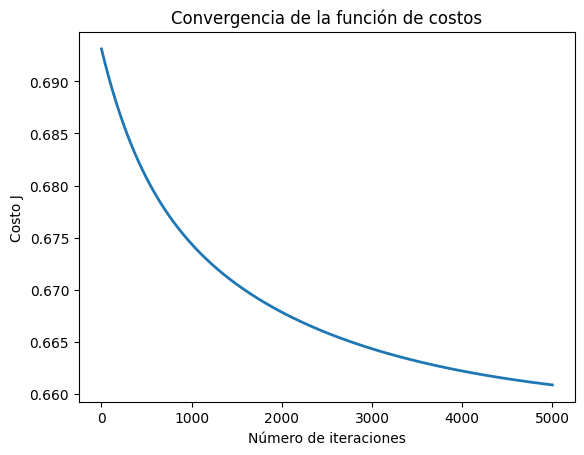

theta calculado por el descenso por el gradiente: [-0.2478508   0.11348321 -0.06251338  0.00159775  0.01880998 -0.01129108
 -0.01252038 -0.07589369 -0.04010808 -0.07777597  0.127323   -0.00479285
 -0.04394238 -0.01854876 -0.03274487 -0.02821708 -0.03629268 -0.03229643
 -0.01851772  0.00321672 -0.00190954 -0.00274409 -0.0050306   0.00285274
 -0.00598689 -0.00214255]
Precisión en el conjunto de entrenamiento: 61.96%
Precisión en el conjunto de prueba: 61.93%


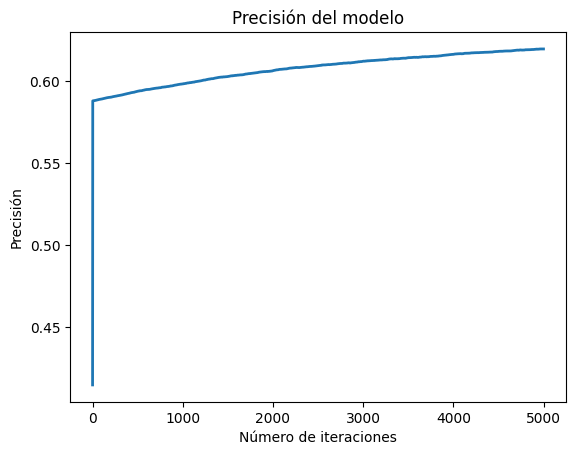

Casos de prueba:
Valores esperados: [0 0 0 0 0 0 0 1 1 1]
Valores predichos: [0, 1, 0, 0, 0, 0, 1, 1, 0, 1]


In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Cargar los datasets de entrenamiento y prueba
train_data = pd.read_csv('synthetic_train_data.csv')
test_data = pd.read_csv('synthetic_test_data.csv')

# Convertir características categóricas y booleanas a valores numéricos
def preprocess_data(data):
    data['winner.strategy_type'] = data['winner.strategy_type'].map({'Offensive': 1, 'Defensive': 0})
    data['loser.strategy_type'] = data['loser.strategy_type'].map({'Offensive': 1, 'Defensive': 0})
    data['winner.fav_card_type'] = data['winner.fav_card_type'].map({'A': 1, 'B': 2, 'C': 3})
    data['loser.fav_card_type'] = data['loser.fav_card_type'].map({'A': 1, 'B': 2, 'C': 3})
    data['winner.used_legendary'] = data['winner.used_legendary'].astype(int)
    data['loser.used_legendary'] = data['loser.used_legendary'].astype(int)
    data['winner.triple_crown_win'] = data['winner.triple_crown_win'].astype(int)
    return data

train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Seleccionar características y etiquetas del conjunto de entrenamiento
X_train = train_data.drop(columns=['winner.crowns', 'loser.crowns']).values
y_train = (train_data['winner.crowns'] == 1.0).astype(int).values  # Verificar que el jugador gana con 2 coronas

# Seleccionar características y etiquetas del conjunto de prueba
X_test = test_data.drop(columns=['winner.crowns', 'loser.crowns']).values
y_test = (test_data['winner.crowns'] == 1.0).astype(int).values  # Verificar que el jugador gana con 2 coronas

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalizar las características
X_train, mu, sigma = featureNormalize(X_train)
X_test = (X_test - mu) / sigma

# Agregar una columna de unos para el término de intercepción
m, n = X_train.shape
X_train = np.concatenate([np.ones((m, 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

def calcularCosto(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    accuracy_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))
        
        # Calcular precisión
        predictions = h >= 0.5
        accuracy = np.mean(predictions == y)
        accuracy_history.append(accuracy)

        # Imprimir el costo en cada iteración
        if i % 100 == 0:
            print(f'Iteración {i}: Costo {J_history[-1]}')

    return theta, J_history, accuracy_history

# Elegir un valor para alpha y número de iteraciones
alpha = 0.001
num_iters = 5000

# Inicializar theta y ejecutar el descenso por el gradiente
theta = np.zeros(n + 1)
theta, J_history, accuracy_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

# Graficar la convergencia del costo
plt.figure()

plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia de la función de costos')
plt.show()

# Mostrar los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Evaluar el modelo en el conjunto de entrenamiento y prueba y sus graficas
def evaluarModelo(X, y, theta):
    h = sigmoid(X.dot(theta.T))
    predictions = h >= 0.5
    accuracy = np.mean(predictions == y)
    return accuracy

# Evaluar el modelo en el conjunto de entrenamiento
train_accuracy = evaluarModelo(X_train, y_train, theta)
print(f'Precisión en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%')

# Evaluar el modelo en el conjunto de prueba
test_accuracy = evaluarModelo(X_test, y_test, theta)
print(f'Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%')

# Graficar la precisión a lo largo de las iteraciones
plt.figure()

plt.plot(np.arange(len(accuracy_history)), accuracy_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Precisión')
plt.title('Precisión del modelo')
plt.show()

# Predicciones de manera manual primero para comparar con las predicciones del modelo entrenado como valores esperados, y valores predichos para 10 predicciones
predictions_manual_test = []
y_manual_test = y_test[:10]
for i in range(10):
    h = sigmoid(X_test[i].dot(theta.T))
    prediction = int(h >= 0.5)
    predictions_manual_test.append(prediction)

# imprimir casos de prueba (valores esperados y predichos)
print('Casos de prueba:')
print('Valores esperados:', y_manual_test)
print('Valores predichos:', predictions_manual_test)

Segunda clase "Ganador con 2 coronas"

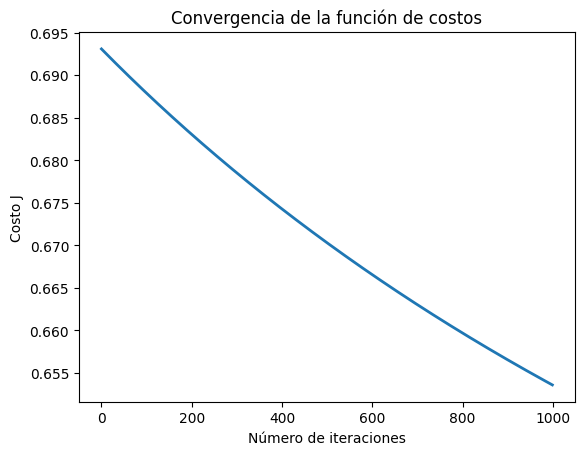

theta calculado por el descenso por el gradiente: [-1.89811384e-01 -1.74209338e-02 -2.86791144e-03  1.48201700e-02
  7.38720503e-03  1.43198080e-02  1.11417183e-02  1.56559045e-02
  1.39443642e-02  1.00358293e-02 -1.43144798e-02 -6.97056995e-03
  1.86728826e-02  1.43998909e-02  1.14719663e-02  1.19630382e-02
  1.63236048e-02  1.38009266e-02  8.10708448e-03 -1.41973660e-03
 -3.68774512e-04  1.34696827e-03  6.60657377e-04 -1.07781951e-03
  2.44039039e-03  3.60223632e-05]
Precisión en el conjunto de entrenamiento: 70.09%
Precisión en el conjunto de prueba: 69.96%


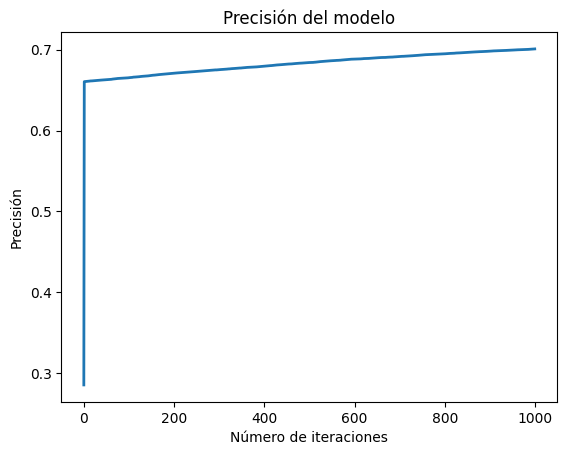

Casos de prueba:
Valores esperados: [1 1 0 1 0 1 1 0 0 0]
Valores predichos: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Cargar los datasets de entrenamiento y prueba
train_data = pd.read_csv('synthetic_train_data.csv')
test_data = pd.read_csv('synthetic_test_data.csv')

# Convertir características categóricas y booleanas a valores numéricos
def preprocess_data(data):
    data['winner.strategy_type'] = data['winner.strategy_type'].map({'Offensive': 1, 'Defensive': 0})
    data['loser.strategy_type'] = data['loser.strategy_type'].map({'Offensive': 1, 'Defensive': 0})
    data['winner.fav_card_type'] = data['winner.fav_card_type'].map({'A': 1, 'B': 2, 'C': 3})
    data['loser.fav_card_type'] = data['loser.fav_card_type'].map({'A': 1, 'B': 2, 'C': 3})
    data['winner.used_legendary'] = data['winner.used_legendary'].astype(int)
    data['loser.used_legendary'] = data['loser.used_legendary'].astype(int)
    data['winner.triple_crown_win'] = data['winner.triple_crown_win'].astype(int)
    return data

train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Seleccionar características y etiquetas del conjunto de entrenamiento
X_train = train_data.drop(columns=['winner.crowns', 'loser.crowns']).values
y_train = (train_data['winner.crowns'] == 2.0).astype(int).values  # Verificar que el jugador gana con 2 coronas

# Seleccionar características y etiquetas del conjunto de prueba
X_test = test_data.drop(columns=['winner.crowns', 'loser.crowns']).values
y_test = (test_data['winner.crowns'] == 2.0).astype(int).values  # Verificar que el jugador gana con 2 coronas

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalizar las características
X_train, mu, sigma = featureNormalize(X_train)
X_test = (X_test - mu) / sigma

# Agregar una columna de unos para el término de intercepción
m, n = X_train.shape
X_train = np.concatenate([np.ones((m, 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

def calcularCosto(theta, X, y, lambda_):
    m = y.size
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    return J

def descensoGradiente(theta, X, y, alpha, num_iters, lambda_):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    accuracy_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta[0] = theta[0] - (alpha / m) * (h - y).dot(X[:, 0])
        theta[1:] = theta[1:] - (alpha / m) * (h - y).dot(X[:, 1:]) + (lambda_ / m) * theta[1:]
        J_history.append(calcularCosto(theta, X, y, lambda_))
        
        # Calcular precisión
        predictions = h >= 0.5
        accuracy = np.mean(predictions == y)
        accuracy_history.append(accuracy)

    return theta, J_history, accuracy_history

# Elegir un valor para alpha, número de iteraciones y lambda (regularización)
alpha = 0.001
num_iters = 1000
lambda_ = 1

# Inicializar theta y ejecutar el descenso por el gradiente
theta = np.zeros(n + 1)
theta, J_history, accuracy_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters, lambda_)

# Graficar la convergencia del costo
plt.figure()

plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia de la función de costos')
plt.show()

# Mostrar los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Evaluar el modelo en el conjunto de entrenamiento y prueba y sus graficas
def evaluarModelo(X, y, theta):
    h = sigmoid(X.dot(theta.T))
    predictions = h >= 0.5
    accuracy = np.mean(predictions == y)
    return accuracy

# Evaluar el modelo en el conjunto de entrenamiento
train_accuracy = evaluarModelo(X_train, y_train, theta)
print(f'Precisión en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%')

# Evaluar el modelo en el conjunto de prueba
test_accuracy = evaluarModelo(X_test, y_test, theta)
print(f'Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%')

# Graficar la precisión a lo largo de las iteraciones
plt.figure()

plt.plot(np.arange(len(accuracy_history)), accuracy_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Precisión')
plt.title('Precisión del modelo')
plt.show()

# Predicciones de manera manual primero para comparar con las predicciones del modelo entrenado como valores esperados, y valores predichos para 10 predicciones
predictions_manual_test = []
y_manual_test = y_test[:10]
for i in range(10):
    h = sigmoid(X_test[i].dot(theta.T))
    prediction = int(h >= 0.5)
    predictions_manual_test.append(prediction)

# imprimir casos de prueba (valores esperados y predichos)
print('Casos de prueba:')
print('Valores esperados:', y_manual_test)
print('Valores predichos:', predictions_manual_test)

Tercera clase "ganador con 3 coronas"

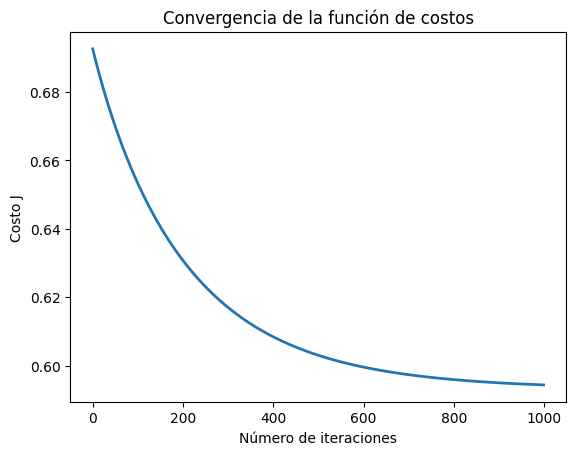

theta calculado por el descenso por el gradiente: [-8.18694497e-01 -2.92525232e-02  1.96390993e-02  1.43635924e-02
  7.17235429e-03  3.57958564e-02  2.33744321e-02  4.31853451e-02
  2.51318944e-02  3.14741291e-02 -1.11579029e-02  1.36711822e-03
  3.40355034e-02  2.89854814e-02  2.15061415e-02  2.86760722e-02
  4.61228974e-02  2.47721854e-02  2.21740320e-02 -6.12105594e-03
 -1.56871240e-03  6.30637355e-03  3.40788605e-03 -4.92892062e-03
  1.08805406e-02 -2.93883858e-04]
Precisión en el conjunto de entrenamiento: 71.44%
Precisión en el conjunto de prueba: 71.32%


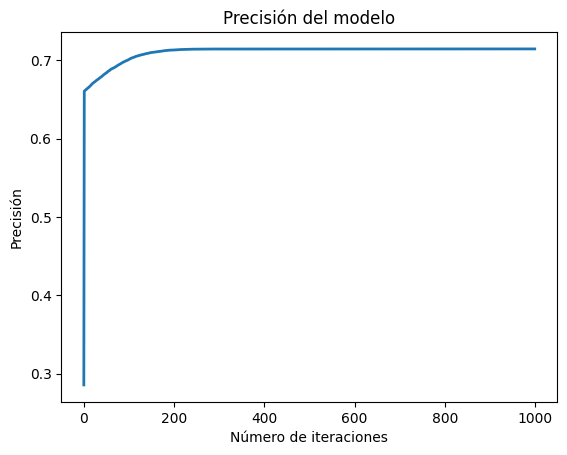

Casos de prueba:
Valores esperados: [1 1 0 1 0 1 1 0 0 0]
Valores predichos: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Cargar los datasets de entrenamiento y prueba
train_data = pd.read_csv('synthetic_train_data.csv')
test_data = pd.read_csv('synthetic_test_data.csv')

# Convertir características categóricas y booleanas a valores numéricos
def preprocess_data(data):
    data['winner.strategy_type'] = data['winner.strategy_type'].map({'Offensive': 1, 'Defensive': 0})
    data['loser.strategy_type'] = data['loser.strategy_type'].map({'Offensive': 1, 'Defensive': 0})
    data['winner.fav_card_type'] = data['winner.fav_card_type'].map({'A': 1, 'B': 2, 'C': 3})
    data['loser.fav_card_type'] = data['loser.fav_card_type'].map({'A': 1, 'B': 2, 'C': 3})
    data['winner.used_legendary'] = data['winner.used_legendary'].astype(int)
    data['loser.used_legendary'] = data['loser.used_legendary'].astype(int)
    data['winner.triple_crown_win'] = data['winner.triple_crown_win'].astype(int)
    return data

train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Seleccionar características y etiquetas del conjunto de entrenamiento
X_train = train_data.drop(columns=['winner.crowns', 'loser.crowns']).values
y_train = (train_data['winner.crowns'] == 2).astype(int).values  # Verificar que el jugador gana con 3 coronas

# Seleccionar características y etiquetas del conjunto de prueba
X_test = test_data.drop(columns=['winner.crowns', 'loser.crowns']).values
y_test = (test_data['winner.crowns'] == 2).astype(int).values  # Verificar que el jugador gana con 3 coronas

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalizar las características
X_train, mu, sigma = featureNormalize(X_train)
X_test = (X_test - mu) / sigma

# Agregar una columna de unos para el término de intercepción
m, n = X_train.shape
X_train = np.concatenate([np.ones((m, 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

def calcularCosto(theta, X, y, lambda_):
    m = y.size
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    return J

def descensoGradiente(theta, X, y, alpha, num_iters, lambda_):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    accuracy_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta[0] = theta[0] - (alpha / m) * (h - y).dot(X[:, 0])
        theta[1:] = theta[1:] - (alpha / m) * (h - y).dot(X[:, 1:]) + (lambda_ / m) * theta[1:]
        J_history.append(calcularCosto(theta, X, y, lambda_))
        
        # Calcular precisión
        predictions = h >= 0.5
        accuracy = np.mean(predictions == y)
        accuracy_history.append(accuracy)

    return theta, J_history, accuracy_history

# Elegir un valor para alpha, número de iteraciones y lambda (regularización)
alpha = 0.01
num_iters = 45000
lambda_ = 1

# Inicializar theta y ejecutar el descenso por el gradiente
theta = np.zeros(n + 1)
theta, J_history, accuracy_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters, lambda_)

# Graficar la convergencia del costo
plt.figure()

plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia de la función de costos')
plt.show()

# Mostrar los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Evaluar el modelo en el conjunto de entrenamiento y prueba y sus graficas
def evaluarModelo(X, y, theta):
    h = sigmoid(X.dot(theta.T))
    predictions = h >= 0.5
    accuracy = np.mean(predictions == y)
    return accuracy

# Evaluar el modelo en el conjunto de entrenamiento
train_accuracy = evaluarModelo(X_train, y_train, theta)
print(f'Precisión en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%')

# Evaluar el modelo en el conjunto de prueba
test_accuracy = evaluarModelo(X_test, y_test, theta)
print(f'Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%')

# Graficar la precisión a lo largo de las iteraciones
plt.figure()

plt.plot(np.arange(len(accuracy_history)), accuracy_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Precisión')
plt.title('Precisión del modelo')
plt.show()

# Predicciones de manera manual primero para comparar con las predicciones del modelo entrenado como valores esperados, y valores predichos para 10 predicciones
predictions_manual_test = []
y_manual_test = y_test[:10]
for i in range(10):
    h = sigmoid(X_test[i].dot(theta.T))
    prediction = int(h >= 0.5)
    predictions_manual_test.append(prediction)

# imprimir casos de prueba (valores esperados y predichos)
print('Casos de prueba:')
print('Valores esperados:', y_manual_test)
print('Valores predichos:', predictions_manual_test)

# 6.- Entrenar un modelo One-vs-All para reemplazar el modelo desarrollado en los puntos 5 y 6.,      
# 7.- Se debe visualizar de manera obligatorio graficas que muestren el costo y la precisión en relación a los epochs de entrenamiento. 
# 8.- Se debe utilizar el dataset de entrenamiento para entrenar los pesos de los modelos desarrollados. 
# 9.- Se debe utilizar el dataset de prueba para determinar la efectividad de los modelos desarrollados.

Falta del Uso de optimize en el Cálculo One-vs-All
En lugar de utilizar funciones de optimización avanzadas como scipy.optimize.minimize, el código opta por implementar el descenso por gradiente manualmente. Aquí hay una explicación de por qué y cómo se lleva a cabo el cálculo:

Descenso por Gradiente Manual
El descenso por gradiente es una técnica iterativa para optimizar los parámetros del modelo. En este caso, se utiliza para minimizar la función de costo de la regresión logística con regularización.

Inicialización de Parámetros:

Los parámetros theta se inicializan en ceros.
Se agrega una columna de unos a la matriz de características X para incluir el término de intercepción.
Cálculo del Costo y Gradiente:

La función lrCostFunction calcula el costo y el gradiente para la regresión logística con regularización.
El costo incluye un término de regularización para evitar el sobreajuste.
El gradiente se ajusta para incluir la regularización, excepto para el término de intercepción.
Actualización de Parámetros:

En cada iteración del descenso por gradiente, los parámetros theta se actualizan restando el producto de la tasa de aprendizaje alpha y el gradiente.
El costo se almacena en J_history para monitorear la convergencia.
Iteraciones:

El proceso se repite durante num_iters iteraciones o hasta que el costo converja.

# Primero se importan las librerias necesarias

ponemos las funciones , sigmoide y "lrCostFcuntion" que es la funcion de costo para la regresion logistica con regularizacion

lrCostFunction: Calcula el costo y el gradiente para la regresión logística con regularización.
theta: Parámetros del modelo.
X: Características del conjunto de datos.
y: Etiquetas del conjunto de datos.
lambda_: Parámetro de regularización.
J: Costo calculado.
grad: Gradiente calculado.

Posterior se hace el descenso por el gradiente de la siguiente manera:
```
def gradientDescent(X, y, theta, alpha, num_iters, lambda_):
    J_history = []

    for i in range(num_iters):
        J, grad = lrCostFunction(theta, X, y, lambda_)
        theta = theta - alpha * grad
        J_history.append(J)
    
    return theta, J_history
```

gradientDescent: Realiza el descenso por gradiente para optimizar los parámetros theta.
alpha: Tasa de aprendizaje.
num_iters: Número de iteraciones.
J_history: Historial del costo durante el entrenamiento.

Entrenamiento One vs All
oneVsAll: Entrena múltiples clasificadores de regresión logística para cada clase.
num_labels: Número de clases.
all_theta: Parámetros optimizados para cada clase

luego se hace la Prediccion one vs all
```
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    return np.argmax(sigmoid(X.dot(all_theta.T)), axis=1)
```
predictOneVsAll: Predice las etiquetas para el conjunto de datos dado los parámetros entrenados.
all_theta: Parámetros entrenados para cada clase.
X: Características del conjunto de datos.

Se cargan los datos de entrenamiento y prueba usando pandas, se seleccionan las caracteristicas y etiquetas

# Hiper Parametros
lambda, aplha, numero de iteraciones, numero de labels (clases)

posterior se hace un entrenamiento al conjunto de prueba
```
pred_train = predictOneVsAll(all_theta, X_train)
pred_test = predictOneVsAll(all_theta, X_test)
```

Predicciones en el conjunto de entrenamiento y prueba utilizando los parámetros entrenados.

se calcula la presicion del modelo 

se grafica el costo durante el entrenamiento: 
- plotCost: Función para graficar el costo durante el entrenamiento.

# Entrenamiento con Registro del Costo
```
def oneVsAllWithCost(X, y, num_labels, lambda_, alpha, num_iters):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    all_J_history = []
    
    # Agregar columna de unos a X (intercepto)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in range(num_labels):
        initial_theta = np.zeros(n + 1)
        y_c = np.where(y == c, 1, 0)  # Etiqueta binaria para la clase c
        theta, J_history = gradientDescent(X, y_c, initial_theta, alpha, num_iters, lambda_)
        all_theta[c] = theta
        all_J_history.append(J_history)
    
    return all_theta, all_J_history
```

oneVsAllWithCost: Entrena múltiples clasificadores de regresión logística para cada clase y captura el costo durante el entrenamiento.

luego se entrena y captura el costo durante el entrenamiento, posterior se grafica los costos para todas las clases en relacion a sus epochs o iteraciones


Importacion de librerias

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Definicion de la funcion sigmoide: La función sigmoide es la función de activación que usamos en la regresión logística. Esta función convierte cualquier número real en un valor entre 0 y 1, lo que es ideal para modelar probabilidades.

In [2]:
# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Funcion de costos:
Esta función calcula el costo J y el gradiente grad para la regresión logística con regularización:

theta: parámetros del modelo.
X: conjunto de características.
y: etiquetas.
lambda_: parámetro de regularización para prevenir el overfitting.
La regularización solo afecta a los términos después del primero (theta[1:]), lo que permite que el bias no sea regularizado.

In [3]:
# Función de costo para la regresión logística con regularización
def lrCostFunction(theta, X, y, lambda_):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    # Regularización (sin incluir el primer término)
    reg = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    
    # Costo
    J = (-1 / m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h))) + reg
    
    # Gradiente
    grad = (1 / m) * X.T.dot(h - y)
    grad[1:] = grad[1:] + (lambda_ / m) * theta[1:]
    
    return J, grad

Descenso por el gradiente

In [4]:
# Descenso por gradiente
def gradientDescent(X, y, theta, alpha, num_iters, lambda_):
    J_history = []

    for i in range(num_iters):
        J, grad = lrCostFunction(theta, X, y, lambda_)
        theta = theta - alpha * grad
        J_history.append(J)
    
    return theta, J_history


Implementación de One-vs-All:

Este es el corazón del algoritmo One-vs-All:

Para cada etiqueta de clase c, crea un vector de etiquetas binarias y_c donde:
1 si la clase es c.
0 para todas las demás clases.
Luego entrena un modelo de regresión logística para distinguir esa clase (c) de las otras usando descenso por gradiente.
Se devuelve all_theta, que contiene los parámetros entrenados para cada clase.

In [5]:
# Entrenamiento One-vs-All con etiquetas correctas
def oneVsAllWithCost(X, y, num_labels, lambda_, alpha, num_iters):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    all_J_history = []
    
    # Agregar columna de unos a X (intercepto)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in range(1, num_labels + 1):
        initial_theta = np.zeros(n + 1)
        y_c = np.where(y == c, 1, 0)  # Etiqueta binaria para la clase c
        print(f'Verificación de etiquetas binarias para la clase {c}: Clase {c} = 1, Otras clases = 0')
        theta, J_history = gradientDescent(X, y_c, initial_theta, alpha, num_iters, lambda_)
        all_theta[c - 1] = theta
        all_J_history.append(J_history)
    
    return all_theta, all_J_history

En el algoritmo One-vs-All, por cada iteración de la clase c, estamos creando un nuevo conjunto de etiquetas binarias. Si la clase es c, le asignamos 1, y si no, le asignamos 0. Esto asegura que no haya solapamiento entre las clases, ya que cada modelo está entrenado para una sola clase contra todas las demás.

Por ejemplo:

Si estás entrenando para la clase 1, todas las muestras de esa clase tendrán valor 1, y el resto de las clases serán 0.
Para la clase 2, se repite el proceso pero asignando 1 a la clase 2 y 0 a las demás.
Verificación: En el código, esto se verifica con esta línea:

Predicción con One-vs-All: Esta función usa los parámetros entrenados (all_theta) para hacer predicciones:

Se añaden unos a X (para el bias).
Luego se calcula el valor de la función sigmoide para cada clase.
Finalmente, se predice la clase con la mayor probabilidad.

In [6]:
# Predicción One-vs-All
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    return np.argmax(sigmoid(X.dot(all_theta.T)), axis=1) + 1

Carga y preprocesamiento de los datasets

In [7]:
# Cargar datasets de entrenamiento y prueba
train_data = pd.read_csv('synthetic_train_data.csv')
test_data = pd.read_csv('synthetic_test_data.csv')

# Convertir características categóricas y booleanas a valores numéricos
def preprocess_data(data):
    data['winner.strategy_type'] = data['winner.strategy_type'].map({'Offensive': 1, 'Defensive': 0})
    data['loser.strategy_type'] = data['loser.strategy_type'].map({'Offensive': 1, 'Defensive': 0})
    data['winner.fav_card_type'] = data['winner.fav_card_type'].map({'A': 1, 'B': 2, 'C': 3})
    data['loser.fav_card_type'] = data['loser.fav_card_type'].map({'A': 1, 'B': 2, 'C': 3})
    data['winner.used_legendary'] = data['winner.used_legendary'].astype(int)
    data['loser.used_legendary'] = data['loser.used_legendary'].astype(int)
    data['winner.triple_crown_win'] = data['winner.triple_crown_win'].astype(int)
    return data

train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)


 Selección de características y etiquetas

In [8]:
# Seleccionar características y etiquetas del conjunto de entrenamiento
X_train = train_data[['winner.totalcard.level', 'winner.troop.count', 'winner.structure.count', 'winner.spell.count', 'winner.common.count', 'winner.rare.count', 'winner.epic.count', 'winner.legendary.count', 'winner.elixir.average', 'loser.totalcard.level', 'loser.troop.count', 'loser.structure.count', 'loser.spell.count', 'loser.common.count', 'loser.rare.count', 'loser.epic.count', 'loser.legendary.count', 'loser.elixir.average', 'winner.strategy_type', 'loser.strategy_type', 'winner.fav_card_type', 'loser.fav_card_type', 'winner.used_legendary', 'loser.used_legendary', 'winner.triple_crown_win']].values
y_train = train_data['winner.crowns'].values

# Seleccionar características y etiquetas del conjunto de prueba
X_test = test_data[['winner.totalcard.level', 'winner.troop.count', 'winner.structure.count', 'winner.spell.count', 'winner.common.count', 'winner.rare.count', 'winner.epic.count', 'winner.legendary.count', 'winner.elixir.average', 'loser.totalcard.level', 'loser.troop.count', 'loser.structure.count', 'loser.spell.count', 'loser.common.count', 'loser.rare.count', 'loser.epic.count', 'loser.legendary.count', 'loser.elixir.average', 'winner.strategy_type', 'loser.strategy_type', 'winner.fav_card_type', 'loser.fav_card_type', 'winner.used_legendary', 'loser.used_legendary', 'winner.triple_crown_win']].values
y_test = test_data['winner.crowns'].values

Normalización de las características: Se normalizan las características del conjunto de entrenamiento para que cada una tenga una media de 0 y desviación estándar de 1, lo que ayuda a que el modelo converja más rápidamente.

In [9]:
# Normalizar las características
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_train, mu, sigma = featureNormalize(X_train)
X_test = (X_test - mu) / sigma


Entrenamiento del modelo One-vs-All: Se entrena el modelo utilizando One-vs-All con los hiperparámetros definidos:

num_labels: número de clases diferentes en el conjunto de entrenamiento.
lambda_: parámetro de regularización.
alpha: tasa de aprendizaje.
num_iters: número de iteraciones del descenso por gradiente.

In [10]:
# Parámetros
lambda_ = 0.1  # Regularización
alpha = 0.001
num_iters = 15000
num_labels = 3 # Número de clases

# Entrenar el modelo One-vs-All con verificación de etiquetas binarias
all_theta, all_J_history = oneVsAllWithCost(X_train, y_train, num_labels, lambda_, alpha, num_iters)

# Predicciones en el conjunto de prueba
pred_train = predictOneVsAll(all_theta, X_train)
pred_test = predictOneVsAll(all_theta, X_test)

Verificación de etiquetas binarias para la clase 1: Clase 1 = 1, Otras clases = 0
Verificación de etiquetas binarias para la clase 2: Clase 2 = 1, Otras clases = 0
Verificación de etiquetas binarias para la clase 3: Clase 3 = 1, Otras clases = 0


Predicción y evaluación en el conjunto de prueba

In [11]:
# Calcular precisión
train_accuracy = np.mean(pred_train == y_train) * 100
test_accuracy = np.mean(pred_test == y_test) * 100

print(f'Precisión en conjunto de entrenamiento: {train_accuracy:.2f}%')
print(f'Precisión en conjunto de prueba: {test_accuracy:.2f}%')


Precisión en conjunto de entrenamiento: 42.76%
Precisión en conjunto de prueba: 42.62%


Gráfica del costo

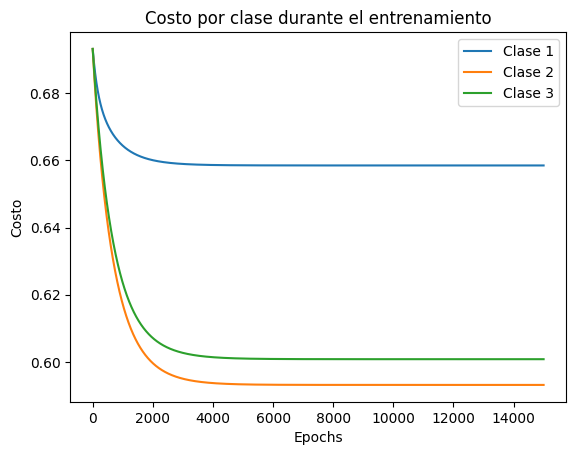

In [12]:
# Graficar el costo durante el entrenamiento
plt.figure()
for i, J_history in enumerate(all_J_history):
    plt.plot(np.arange(len(J_history)), J_history, label=f'Clase {i+1}')
plt.xlabel('Epochs')
plt.ylabel('Costo')
plt.title('Costo por clase durante el entrenamiento')
plt.legend()
plt.show()

In [43]:
# Predicciones manuales y comparación
X_manual_test = np.array([
    [1,3, 2, 104, 5, 1, 2, 3, 2, 3, 0, 4.5, 104, 3, 1, 4, 1, 1, 4, 2, 3.5, 0, 1, 1, 1],
    [1,2, 2, 105, 4, 2, 3, 2, 3, 2, 1, 4.0, 105, 2, 2, 3, 2, 2, 3, 3, 3.0, 1, 0, 0, 0]
])
y_manual_test = np.array([1, 2])  # Valores esperados

# Normalizar las características del caso de prueba manual
X_manual_test = (X_manual_test - mu) / sigma
X_manual_test = np.concatenate([np.ones((X_manual_test.shape[0], 1)), X_manual_test], axis=1)

# Predicciones del caso de prueba manual
h_manual_test = sigmoid(X_manual_test.dot(all_theta.T))
predictions_manual_test = np.argmax(h_manual_test, axis=1) + 1

print('Predicciones del caso de prueba manual:', predictions_manual_test)
print('Valores esperados:', y_manual_test)

Predicciones del caso de prueba manual: [2 2]
Valores esperados: [1 2]
